In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
from calculations import *
from plot_helper import *
import matplotlib.patches as patches
import pandas as pd
from tqdm import tqdm

model = YOLO("models/WhatsappWindow_Models/v4.pt")

In [2]:
annotations_bbox_padding_test = pd.read_csv("WhatsappWindowDatasetPADDING/WhatsappWindowDatasetPADDING-Test/_annotations.csv")
annotations_bbox_padding_test = annotations_bbox_padding_test.drop(columns=['width','height'], axis=0)
annotations_bbox_padding_test

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-21-12-06_jpeg.rf....,window,957,1,1920,1019
1,Screenshot-2024-06-15-at-5-41-16-PM_png.rf.232...,window,200,106,1165,971
2,WhatsApp-Image-2024-06-14-at-21-15-12_jpeg.rf....,window,12,1,1914,1078
3,5_png.rf.39c0027c1ba83d004457a08cbfcc91d7.jpg,window,763,24,1892,940
4,Screenshot-2024-06-14-at-6-32-33-PM_png.rf.002...,window,352,131,1594,948
5,10_png.rf.d3d13fb6113d7a34efabdf8e85a86e95.jpg,window,59,248,1163,967
6,Screenshot-2024-06-14-at-9-46-56-PM_png.rf.05d...,window,777,54,1544,896
7,WhatsApp-Image-2024-06-14-at-20-25-23_jpeg.rf....,window,327,112,1665,988
8,WhatsApp-Image-2024-06-14-at-20-20-32_jpeg.rf....,window,322,111,1670,921
9,WhatsApp-Image-2024-06-14-at-21-06-45_jpeg.rf....,window,63,196,1071,898


In [3]:
prediction_annotation_padding_test = []
for i in tqdm(range(len(annotations_bbox_padding_test))):
    predictions = []
    filename = annotations_bbox_padding_test.iloc[i].filename
    image_path = f"WhatsappWindowDatasetPADDING/WhatsappWindowDatasetPADDING-Test/{filename}"
    im = plt.imread(image_path)
    try:
        b = model.predict(im)[0].boxes
        predictions.append(filename)
        predictions.append('window')
        predictions.extend(list(map(int, b.xyxy[0].tolist())))
    except: pass
    prediction_annotation_padding_test.append(predictions)

  0%|          | 0/26 [00:00<?, ?it/s]


0: 576x1024 1 window, 1379.2ms
Speed: 6.7ms preprocess, 1379.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


  4%|▍         | 1/26 [00:01<00:42,  1.72s/it]


0: 576x1024 1 window, 1298.5ms
Speed: 5.0ms preprocess, 1298.5ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


  8%|▊         | 2/26 [00:03<00:35,  1.49s/it]


0: 576x1024 3 windows, 1294.4ms
Speed: 4.9ms preprocess, 1294.4ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 12%|█▏        | 3/26 [00:04<00:32,  1.41s/it]


0: 576x1024 1 window, 1314.4ms
Speed: 5.5ms preprocess, 1314.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 15%|█▌        | 4/26 [00:05<00:30,  1.39s/it]


0: 576x1024 1 window, 1296.6ms
Speed: 5.0ms preprocess, 1296.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 19%|█▉        | 5/26 [00:07<00:28,  1.36s/it]


0: 576x1024 1 window, 1323.0ms
Speed: 5.0ms preprocess, 1323.0ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 23%|██▎       | 6/26 [00:08<00:27,  1.36s/it]


0: 576x1024 1 window, 1355.7ms
Speed: 5.7ms preprocess, 1355.7ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 27%|██▋       | 7/26 [00:09<00:25,  1.37s/it]


0: 576x1024 1 window, 1335.4ms
Speed: 5.1ms preprocess, 1335.4ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 31%|███       | 8/26 [00:11<00:24,  1.37s/it]


0: 576x1024 2 windows, 1346.0ms
Speed: 6.0ms preprocess, 1346.0ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 35%|███▍      | 9/26 [00:12<00:23,  1.37s/it]


0: 576x1024 1 window, 1293.6ms
Speed: 5.2ms preprocess, 1293.6ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 38%|███▊      | 10/26 [00:13<00:21,  1.36s/it]


0: 576x1024 1 window, 1337.5ms
Speed: 4.8ms preprocess, 1337.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 42%|████▏     | 11/26 [00:15<00:20,  1.36s/it]


0: 576x1024 1 window, 1337.6ms
Speed: 5.1ms preprocess, 1337.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 46%|████▌     | 12/26 [00:16<00:19,  1.36s/it]


0: 576x1024 1 window, 1346.9ms
Speed: 5.3ms preprocess, 1346.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 50%|█████     | 13/26 [00:17<00:17,  1.37s/it]


0: 576x1024 1 window, 1301.5ms
Speed: 5.9ms preprocess, 1301.5ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 54%|█████▍    | 14/26 [00:19<00:16,  1.36s/it]


0: 576x1024 1 window, 1289.5ms
Speed: 5.0ms preprocess, 1289.5ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 58%|█████▊    | 15/26 [00:20<00:14,  1.35s/it]


0: 576x1024 1 window, 1292.8ms
Speed: 4.9ms preprocess, 1292.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 62%|██████▏   | 16/26 [00:21<00:13,  1.34s/it]


0: 576x1024 2 windows, 1308.7ms
Speed: 5.7ms preprocess, 1308.7ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 65%|██████▌   | 17/26 [00:23<00:12,  1.34s/it]


0: 576x1024 1 window, 1313.5ms
Speed: 5.2ms preprocess, 1313.5ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 69%|██████▉   | 18/26 [00:24<00:10,  1.34s/it]


0: 576x1024 1 window, 1315.4ms
Speed: 5.7ms preprocess, 1315.4ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 73%|███████▎  | 19/26 [00:25<00:09,  1.34s/it]


0: 576x1024 2 windows, 1359.4ms
Speed: 5.1ms preprocess, 1359.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 77%|███████▋  | 20/26 [00:27<00:08,  1.36s/it]


0: 576x1024 1 window, 1365.3ms
Speed: 6.9ms preprocess, 1365.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 81%|████████  | 21/26 [00:28<00:06,  1.37s/it]


0: 576x1024 2 windows, 1378.7ms
Speed: 4.8ms preprocess, 1378.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 85%|████████▍ | 22/26 [00:30<00:05,  1.38s/it]


0: 576x1024 1 window, 1331.0ms
Speed: 5.2ms preprocess, 1331.0ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 88%|████████▊ | 23/26 [00:31<00:04,  1.38s/it]


0: 576x1024 1 window, 1332.2ms
Speed: 5.1ms preprocess, 1332.2ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 92%|█████████▏| 24/26 [00:32<00:02,  1.37s/it]


0: 576x1024 1 window, 1299.2ms
Speed: 5.0ms preprocess, 1299.2ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 96%|█████████▌| 25/26 [00:34<00:01,  1.36s/it]


0: 576x1024 1 window, 1280.5ms
Speed: 5.3ms preprocess, 1280.5ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


100%|██████████| 26/26 [00:35<00:00,  1.37s/it]


In [4]:
df = pd.DataFrame(prediction_annotation_padding_test).rename(columns={0:"filename", 1:"class", 2:"xmin", 3:"ymin", 4:"xmax", 5:"ymax"})
df

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-21-12-06_jpeg.rf....,window,950,7,1920,1068
1,Screenshot-2024-06-15-at-5-41-16-PM_png.rf.232...,window,197,107,1167,977
2,WhatsApp-Image-2024-06-14-at-21-15-12_jpeg.rf....,window,494,0,1920,1047
3,5_png.rf.39c0027c1ba83d004457a08cbfcc91d7.jpg,window,753,25,1920,929
4,Screenshot-2024-06-14-at-6-32-33-PM_png.rf.002...,window,361,139,1043,1039
5,10_png.rf.d3d13fb6113d7a34efabdf8e85a86e95.jpg,window,44,242,1214,963
6,Screenshot-2024-06-14-at-9-46-56-PM_png.rf.05d...,window,780,50,1542,905
7,WhatsApp-Image-2024-06-14-at-20-25-23_jpeg.rf....,window,338,106,1768,1009
8,WhatsApp-Image-2024-06-14-at-20-20-32_jpeg.rf....,window,309,107,1724,941
9,WhatsApp-Image-2024-06-14-at-21-06-45_jpeg.rf....,window,47,190,1080,896


In [5]:
df.to_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Test/Prediction.csv")
annotations_bbox_padding_test.to_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Test/GroundTruth.csv")

In [6]:
annotations_bbox_padding_train = pd.read_csv("WhatsappWindowDatasetPADDING/WhatsappWindowDatasetPADDING-Train/_annotations.csv")
annotations_bbox_padding_train = annotations_bbox_padding_train.drop(columns=['width','height'], axis=0)
annotations_bbox_padding_train

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-20-25-53_jpeg.rf....,window,309,112,1668,958
1,WhatsApp-Image-2024-06-14-at-20-25-53_jpeg.rf....,window,303,115,1671,985
2,WhatsApp-Image-2024-06-14-at-21-03-54_jpeg.rf....,window,57,49,1833,907
3,17_png.rf.1f31466d7c560e4f14e765b157176da7.jpg,window,545,121,1675,829
4,12_png.rf.09ed9ec551dcf6fefc3a62c5464e61dd.jpg,window,21,288,1151,1009
...,...,...,...,...,...,...
179,Screenshot-2024-06-14-at-9-47-18-PM-10-01-54-P...,window,241,334,1171,1005
180,17_png.rf.f016d751e9e9a774acdad9f550e60960.jpg,window,545,121,1675,829
181,Screenshot-2024-06-14-at-6-32-54-PM_png.rf.ed8...,window,714,191,1587,986
182,Screenshot-2024-06-14-at-6-32-59-PM_png.rf.f41...,window,180,106,1059,914


In [7]:
prediction_annotation_padding_train = []
for i in tqdm(range(len(annotations_bbox_padding_train))):
    predictions = []
    filename = annotations_bbox_padding_train.iloc[i].filename
    image_path = f"WhatsappWindowDatasetPADDING/WhatsappWindowDatasetPADDING-Train/{filename}"
    im = plt.imread(image_path)
    try:
        b = model.predict(im)[0].boxes
        predictions.append(filename)
        predictions.append('window')
        predictions.extend(list(map(int, b.xyxy[0].tolist())))
    except: pass
    prediction_annotation_padding_train.append(predictions)

  0%|          | 0/184 [00:00<?, ?it/s]


0: 576x1024 1 window, 1331.2ms
Speed: 5.0ms preprocess, 1331.2ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


  1%|          | 1/184 [00:01<04:08,  1.36s/it]


0: 576x1024 1 window, 1286.9ms
Speed: 5.4ms preprocess, 1286.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


  1%|          | 2/184 [00:02<04:02,  1.33s/it]


0: 576x1024 2 windows, 1780.3ms
Speed: 5.2ms preprocess, 1780.3ms inference, 13.4ms postprocess per image at shape (1, 3, 576, 1024)


  2%|▏         | 3/184 [00:04<04:43,  1.56s/it]


0: 576x1024 1 window, 1974.9ms
Speed: 23.3ms preprocess, 1974.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


  2%|▏         | 4/184 [00:06<05:18,  1.77s/it]


0: 576x1024 1 window, 1312.3ms
Speed: 5.8ms preprocess, 1312.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


  3%|▎         | 5/184 [00:07<04:49,  1.62s/it]


0: 576x1024 1 window, 1371.1ms
Speed: 5.1ms preprocess, 1371.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


  3%|▎         | 6/184 [00:09<04:34,  1.54s/it]


0: 576x1024 1 window, 1332.7ms
Speed: 5.3ms preprocess, 1332.7ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


  4%|▍         | 7/184 [00:10<04:22,  1.48s/it]


0: 576x1024 1 window, 1350.8ms
Speed: 5.6ms preprocess, 1350.8ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


  4%|▍         | 8/184 [00:12<04:15,  1.45s/it]


0: 576x1024 1 window, 1336.9ms
Speed: 4.9ms preprocess, 1336.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


  5%|▍         | 9/184 [00:13<04:09,  1.42s/it]


0: 576x1024 2 windows, 1288.0ms
Speed: 5.1ms preprocess, 1288.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


  5%|▌         | 10/184 [00:14<04:02,  1.39s/it]


0: 576x1024 1 window, 1281.8ms
Speed: 5.1ms preprocess, 1281.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


  6%|▌         | 11/184 [00:16<03:56,  1.37s/it]


0: 576x1024 1 window, 1276.5ms
Speed: 5.2ms preprocess, 1276.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


  7%|▋         | 12/184 [00:17<03:51,  1.35s/it]


0: 576x1024 1 window, 1274.1ms
Speed: 4.8ms preprocess, 1274.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


  7%|▋         | 13/184 [00:18<03:48,  1.33s/it]


0: 576x1024 2 windows, 1289.3ms
Speed: 4.7ms preprocess, 1289.3ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


  8%|▊         | 14/184 [00:20<03:46,  1.33s/it]


0: 576x1024 1 window, 1310.8ms
Speed: 5.0ms preprocess, 1310.8ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


  8%|▊         | 15/184 [00:21<03:45,  1.33s/it]


0: 576x1024 1 window, 1384.9ms
Speed: 5.0ms preprocess, 1384.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


  9%|▊         | 16/184 [00:22<03:47,  1.36s/it]


0: 576x1024 1 window, 1350.2ms
Speed: 5.2ms preprocess, 1350.2ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


  9%|▉         | 17/184 [00:24<03:47,  1.36s/it]


0: 576x1024 1 window, 1343.9ms
Speed: 5.3ms preprocess, 1343.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 10%|▉         | 18/184 [00:25<03:46,  1.37s/it]


0: 576x1024 1 window, 1363.2ms
Speed: 5.9ms preprocess, 1363.2ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 10%|█         | 19/184 [00:26<03:46,  1.38s/it]


0: 576x1024 1 window, 1310.0ms
Speed: 7.0ms preprocess, 1310.0ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 11%|█         | 20/184 [00:28<03:44,  1.37s/it]


0: 576x1024 1 window, 1296.7ms
Speed: 5.0ms preprocess, 1296.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 11%|█▏        | 21/184 [00:29<03:40,  1.35s/it]


0: 576x1024 2 windows, 1282.4ms
Speed: 5.1ms preprocess, 1282.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 12%|█▏        | 22/184 [00:30<03:37,  1.34s/it]


0: 576x1024 1 window, 1290.6ms
Speed: 4.8ms preprocess, 1290.6ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 12%|█▎        | 23/184 [00:32<03:34,  1.33s/it]


0: 576x1024 1 window, 1374.3ms
Speed: 5.0ms preprocess, 1374.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 13%|█▎        | 24/184 [00:33<03:36,  1.35s/it]


0: 576x1024 1 window, 1334.1ms
Speed: 5.5ms preprocess, 1334.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 14%|█▎        | 25/184 [00:34<03:35,  1.36s/it]


0: 576x1024 1 window, 1331.3ms
Speed: 5.2ms preprocess, 1331.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 14%|█▍        | 26/184 [00:36<03:34,  1.36s/it]


0: 576x1024 2 windows, 1290.4ms
Speed: 5.4ms preprocess, 1290.4ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 15%|█▍        | 27/184 [00:37<03:31,  1.35s/it]


0: 576x1024 2 windows, 1280.3ms
Speed: 5.0ms preprocess, 1280.3ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 15%|█▌        | 28/184 [00:38<03:28,  1.33s/it]


0: 576x1024 2 windows, 1320.8ms
Speed: 5.9ms preprocess, 1320.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 16%|█▌        | 29/184 [00:40<03:27,  1.34s/it]


0: 576x1024 1 window, 1305.6ms
Speed: 4.8ms preprocess, 1305.6ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 16%|█▋        | 30/184 [00:41<03:26,  1.34s/it]


0: 576x1024 1 window, 1331.2ms
Speed: 5.1ms preprocess, 1331.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 17%|█▋        | 31/184 [00:43<03:25,  1.35s/it]


0: 576x1024 1 window, 1358.0ms
Speed: 5.5ms preprocess, 1358.0ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 17%|█▋        | 32/184 [00:44<03:26,  1.36s/it]


0: 576x1024 2 windows, 1299.5ms
Speed: 4.9ms preprocess, 1299.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 18%|█▊        | 33/184 [00:45<03:23,  1.35s/it]


0: 576x1024 1 window, 1317.9ms
Speed: 5.0ms preprocess, 1317.9ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 18%|█▊        | 34/184 [00:47<03:22,  1.35s/it]


0: 576x1024 2 windows, 1334.1ms
Speed: 5.4ms preprocess, 1334.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 19%|█▉        | 35/184 [00:48<03:21,  1.35s/it]


0: 576x1024 1 window, 1287.1ms
Speed: 5.6ms preprocess, 1287.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 20%|█▉        | 36/184 [00:49<03:18,  1.34s/it]


0: 576x1024 1 window, 1303.4ms
Speed: 5.1ms preprocess, 1303.4ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 20%|██        | 37/184 [00:51<03:16,  1.34s/it]


0: 576x1024 1 window, 1339.6ms
Speed: 4.8ms preprocess, 1339.6ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 21%|██        | 38/184 [00:52<03:16,  1.35s/it]


0: 576x1024 1 window, 1351.4ms
Speed: 5.2ms preprocess, 1351.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 21%|██        | 39/184 [00:53<03:16,  1.36s/it]


0: 576x1024 1 window, 1389.4ms
Speed: 5.0ms preprocess, 1389.4ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 22%|██▏       | 40/184 [00:55<03:18,  1.38s/it]


0: 576x1024 1 window, 1360.1ms
Speed: 6.4ms preprocess, 1360.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 22%|██▏       | 41/184 [00:56<03:17,  1.38s/it]


0: 576x1024 1 window, 1443.1ms
Speed: 5.1ms preprocess, 1443.1ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 23%|██▎       | 42/184 [00:58<03:19,  1.41s/it]


0: 576x1024 1 window, 1323.6ms
Speed: 5.1ms preprocess, 1323.6ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 23%|██▎       | 43/184 [00:59<03:16,  1.39s/it]


0: 576x1024 1 window, 1319.7ms
Speed: 5.1ms preprocess, 1319.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 24%|██▍       | 44/184 [01:00<03:13,  1.38s/it]


0: 576x1024 2 windows, 1339.8ms
Speed: 5.3ms preprocess, 1339.8ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 24%|██▍       | 45/184 [01:02<03:11,  1.38s/it]


0: 576x1024 1 window, 1335.1ms
Speed: 5.2ms preprocess, 1335.1ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 25%|██▌       | 46/184 [01:03<03:09,  1.37s/it]


0: 576x1024 1 window, 1319.3ms
Speed: 5.9ms preprocess, 1319.3ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 26%|██▌       | 47/184 [01:04<03:07,  1.37s/it]


0: 576x1024 1 window, 1301.2ms
Speed: 7.1ms preprocess, 1301.2ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 26%|██▌       | 48/184 [01:06<03:06,  1.37s/it]


0: 576x1024 1 window, 1281.6ms
Speed: 5.5ms preprocess, 1281.6ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 27%|██▋       | 49/184 [01:07<03:02,  1.35s/it]


0: 576x1024 1 window, 1282.5ms
Speed: 4.9ms preprocess, 1282.5ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 27%|██▋       | 50/184 [01:08<02:59,  1.34s/it]


0: 576x1024 1 window, 1409.5ms
Speed: 5.3ms preprocess, 1409.5ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 28%|██▊       | 51/184 [01:10<03:02,  1.37s/it]


0: 576x1024 1 window, 1380.3ms
Speed: 5.3ms preprocess, 1380.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 28%|██▊       | 52/184 [01:11<03:02,  1.38s/it]


0: 576x1024 1 window, 1326.6ms
Speed: 5.3ms preprocess, 1326.6ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 29%|██▉       | 53/184 [01:13<02:59,  1.37s/it]


0: 576x1024 1 window, 1324.4ms
Speed: 5.4ms preprocess, 1324.4ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 29%|██▉       | 54/184 [01:14<02:57,  1.37s/it]


0: 576x1024 1 window, 1440.2ms
Speed: 5.4ms preprocess, 1440.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 30%|██▉       | 55/184 [01:15<03:00,  1.40s/it]


0: 576x1024 2 windows, 1326.0ms
Speed: 5.4ms preprocess, 1326.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 30%|███       | 56/184 [01:17<02:57,  1.39s/it]


0: 576x1024 1 window, 1334.6ms
Speed: 5.1ms preprocess, 1334.6ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 31%|███       | 57/184 [01:18<02:55,  1.38s/it]


0: 576x1024 2 windows, 1347.3ms
Speed: 5.9ms preprocess, 1347.3ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 32%|███▏      | 58/184 [01:20<02:53,  1.38s/it]


0: 576x1024 1 window, 1424.4ms
Speed: 5.0ms preprocess, 1424.4ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 32%|███▏      | 59/184 [01:21<02:55,  1.40s/it]


0: 576x1024 1 window, 1378.5ms
Speed: 5.3ms preprocess, 1378.5ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 33%|███▎      | 60/184 [01:22<02:54,  1.40s/it]


0: 576x1024 1 window, 1336.2ms
Speed: 4.9ms preprocess, 1336.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 33%|███▎      | 61/184 [01:24<02:51,  1.39s/it]


0: 576x1024 2 windows, 1457.7ms
Speed: 5.1ms preprocess, 1457.7ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 34%|███▎      | 62/184 [01:25<02:53,  1.42s/it]


0: 576x1024 1 window, 1350.3ms
Speed: 5.8ms preprocess, 1350.3ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 34%|███▍      | 63/184 [01:27<02:50,  1.41s/it]


0: 576x1024 1 window, 1372.3ms
Speed: 5.4ms preprocess, 1372.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 35%|███▍      | 64/184 [01:28<02:49,  1.41s/it]


0: 576x1024 1 window, 1389.7ms
Speed: 5.4ms preprocess, 1389.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 35%|███▌      | 65/184 [01:29<02:48,  1.41s/it]


0: 576x1024 1 window, 1334.9ms
Speed: 5.3ms preprocess, 1334.9ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 36%|███▌      | 66/184 [01:31<02:44,  1.40s/it]


0: 576x1024 1 window, 1396.9ms
Speed: 5.5ms preprocess, 1396.9ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 36%|███▋      | 67/184 [01:32<02:44,  1.41s/it]


0: 576x1024 1 window, 1425.8ms
Speed: 5.3ms preprocess, 1425.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 37%|███▋      | 68/184 [01:34<02:44,  1.42s/it]


0: 576x1024 1 window, 1338.5ms
Speed: 5.3ms preprocess, 1338.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 38%|███▊      | 69/184 [01:35<02:41,  1.41s/it]


0: 576x1024 1 window, 1328.2ms
Speed: 5.2ms preprocess, 1328.2ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 38%|███▊      | 70/184 [01:36<02:38,  1.39s/it]


0: 576x1024 2 windows, 1307.0ms
Speed: 5.2ms preprocess, 1307.0ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 39%|███▊      | 71/184 [01:38<02:35,  1.37s/it]


0: 576x1024 1 window, 1349.7ms
Speed: 5.0ms preprocess, 1349.7ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 39%|███▉      | 72/184 [01:39<02:34,  1.38s/it]


0: 576x1024 1 window, 1329.4ms
Speed: 5.4ms preprocess, 1329.4ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 40%|███▉      | 73/184 [01:41<02:32,  1.37s/it]


0: 576x1024 1 window, 1318.5ms
Speed: 5.8ms preprocess, 1318.5ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 1024)


 40%|████      | 74/184 [01:42<02:30,  1.36s/it]


0: 576x1024 1 window, 1309.3ms
Speed: 5.2ms preprocess, 1309.3ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 41%|████      | 75/184 [01:43<02:27,  1.36s/it]


0: 576x1024 1 window, 1349.4ms
Speed: 4.9ms preprocess, 1349.4ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 41%|████▏     | 76/184 [01:45<02:27,  1.36s/it]


0: 576x1024 1 window, 1422.7ms
Speed: 5.3ms preprocess, 1422.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 42%|████▏     | 77/184 [01:46<02:28,  1.39s/it]


0: 576x1024 1 window, 1402.2ms
Speed: 5.2ms preprocess, 1402.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 42%|████▏     | 78/184 [01:47<02:28,  1.40s/it]


0: 576x1024 2 windows, 1373.8ms
Speed: 6.2ms preprocess, 1373.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 43%|████▎     | 79/184 [01:49<02:27,  1.40s/it]


0: 576x1024 1 window, 1462.0ms
Speed: 4.9ms preprocess, 1462.0ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 43%|████▎     | 80/184 [01:50<02:28,  1.43s/it]


0: 576x1024 1 window, 1328.6ms
Speed: 5.2ms preprocess, 1328.6ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 44%|████▍     | 81/184 [01:52<02:25,  1.41s/it]


0: 576x1024 1 window, 1323.5ms
Speed: 5.1ms preprocess, 1323.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 45%|████▍     | 82/184 [01:53<02:22,  1.39s/it]


0: 576x1024 1 window, 1355.0ms
Speed: 6.0ms preprocess, 1355.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 45%|████▌     | 83/184 [01:54<02:20,  1.39s/it]


0: 576x1024 1 window, 1325.7ms
Speed: 5.8ms preprocess, 1325.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 46%|████▌     | 84/184 [01:56<02:18,  1.38s/it]


0: 576x1024 1 window, 1322.0ms
Speed: 5.3ms preprocess, 1322.0ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 46%|████▌     | 85/184 [01:57<02:15,  1.37s/it]


0: 576x1024 1 window, 1425.9ms
Speed: 5.7ms preprocess, 1425.9ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)


 47%|████▋     | 86/184 [01:59<02:17,  1.40s/it]


0: 576x1024 1 window, 1728.5ms
Speed: 6.9ms preprocess, 1728.5ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 1024)


 47%|████▋     | 87/184 [02:00<02:28,  1.54s/it]


0: 576x1024 1 window, 1280.9ms
Speed: 5.9ms preprocess, 1280.9ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 48%|████▊     | 88/184 [02:02<02:20,  1.47s/it]


0: 576x1024 1 window, 1303.6ms
Speed: 5.4ms preprocess, 1303.6ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 48%|████▊     | 89/184 [02:03<02:15,  1.43s/it]


0: 576x1024 1 window, 1280.3ms
Speed: 5.3ms preprocess, 1280.3ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 49%|████▉     | 90/184 [02:04<02:10,  1.39s/it]


0: 576x1024 1 window, 1268.4ms
Speed: 5.1ms preprocess, 1268.4ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 49%|████▉     | 91/184 [02:06<02:06,  1.36s/it]


0: 576x1024 2 windows, 1308.4ms
Speed: 4.9ms preprocess, 1308.4ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 50%|█████     | 92/184 [02:07<02:04,  1.36s/it]


0: 576x1024 1 window, 1338.4ms
Speed: 5.0ms preprocess, 1338.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 51%|█████     | 93/184 [02:08<02:03,  1.36s/it]


0: 576x1024 2 windows, 1269.0ms
Speed: 5.0ms preprocess, 1269.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 51%|█████     | 94/184 [02:10<02:00,  1.34s/it]


0: 576x1024 1 window, 1261.5ms
Speed: 5.1ms preprocess, 1261.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 52%|█████▏    | 95/184 [02:11<01:58,  1.33s/it]


0: 576x1024 1 window, 1266.4ms
Speed: 6.0ms preprocess, 1266.4ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 52%|█████▏    | 96/184 [02:12<01:55,  1.32s/it]


0: 576x1024 1 window, 1263.3ms
Speed: 4.9ms preprocess, 1263.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 53%|█████▎    | 97/184 [02:14<01:54,  1.31s/it]


0: 576x1024 1 window, 1298.4ms
Speed: 5.3ms preprocess, 1298.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 53%|█████▎    | 98/184 [02:15<01:53,  1.32s/it]


0: 576x1024 1 window, 1462.8ms
Speed: 5.0ms preprocess, 1462.8ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 54%|█████▍    | 99/184 [02:16<01:56,  1.37s/it]


0: 576x1024 1 window, 1395.9ms
Speed: 7.3ms preprocess, 1395.9ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 54%|█████▍    | 100/184 [02:18<01:56,  1.39s/it]


0: 576x1024 1 window, 1386.2ms
Speed: 6.2ms preprocess, 1386.2ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 55%|█████▍    | 101/184 [02:19<01:55,  1.40s/it]


0: 576x1024 1 window, 1350.0ms
Speed: 5.8ms preprocess, 1350.0ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 55%|█████▌    | 102/184 [02:21<01:54,  1.39s/it]


0: 576x1024 1 window, 1433.3ms
Speed: 6.7ms preprocess, 1433.3ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 56%|█████▌    | 103/184 [02:22<01:54,  1.41s/it]


0: 576x1024 1 window, 1417.5ms
Speed: 6.0ms preprocess, 1417.5ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 57%|█████▋    | 104/184 [02:24<01:54,  1.43s/it]


0: 576x1024 1 window, 1343.2ms
Speed: 6.0ms preprocess, 1343.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 57%|█████▋    | 105/184 [02:25<01:51,  1.41s/it]


0: 576x1024 1 window, 1320.8ms
Speed: 5.8ms preprocess, 1320.8ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 58%|█████▊    | 106/184 [02:26<01:48,  1.39s/it]


0: 576x1024 2 windows, 1353.5ms
Speed: 6.2ms preprocess, 1353.5ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 58%|█████▊    | 107/184 [02:28<01:47,  1.39s/it]


0: 576x1024 1 window, 1332.2ms
Speed: 6.5ms preprocess, 1332.2ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 59%|█████▊    | 108/184 [02:29<01:45,  1.38s/it]


0: 576x1024 1 window, 1338.2ms
Speed: 5.9ms preprocess, 1338.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 59%|█████▉    | 109/184 [02:30<01:43,  1.38s/it]


0: 576x1024 2 windows, 1400.1ms
Speed: 6.0ms preprocess, 1400.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 60%|█████▉    | 110/184 [02:32<01:43,  1.40s/it]


0: 576x1024 1 window, 1368.2ms
Speed: 5.5ms preprocess, 1368.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 60%|██████    | 111/184 [02:33<01:41,  1.40s/it]


0: 576x1024 1 window, 1345.8ms
Speed: 5.1ms preprocess, 1345.8ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 61%|██████    | 112/184 [02:35<01:40,  1.39s/it]


0: 576x1024 1 window, 1390.5ms
Speed: 6.6ms preprocess, 1390.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 61%|██████▏   | 113/184 [02:36<01:39,  1.40s/it]


0: 576x1024 1 window, 1336.3ms
Speed: 5.2ms preprocess, 1336.3ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 62%|██████▏   | 114/184 [02:37<01:37,  1.39s/it]


0: 576x1024 1 window, 1339.3ms
Speed: 5.5ms preprocess, 1339.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 62%|██████▎   | 115/184 [02:39<01:35,  1.39s/it]


0: 576x1024 1 window, 1327.6ms
Speed: 6.8ms preprocess, 1327.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 63%|██████▎   | 116/184 [02:40<01:34,  1.39s/it]


0: 576x1024 1 window, 1320.6ms
Speed: 6.2ms preprocess, 1320.6ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 64%|██████▎   | 117/184 [02:42<01:32,  1.38s/it]


0: 576x1024 1 window, 1401.0ms
Speed: 7.4ms preprocess, 1401.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 64%|██████▍   | 118/184 [02:43<01:32,  1.40s/it]


0: 576x1024 1 window, 1300.4ms
Speed: 4.8ms preprocess, 1300.4ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 65%|██████▍   | 119/184 [02:44<01:29,  1.38s/it]


0: 576x1024 2 windows, 1260.3ms
Speed: 5.4ms preprocess, 1260.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 65%|██████▌   | 120/184 [02:46<01:26,  1.35s/it]


0: 576x1024 1 window, 1314.6ms
Speed: 5.2ms preprocess, 1314.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 66%|██████▌   | 121/184 [02:47<01:24,  1.35s/it]


0: 576x1024 1 window, 1280.6ms
Speed: 5.2ms preprocess, 1280.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 66%|██████▋   | 122/184 [02:48<01:22,  1.34s/it]


0: 576x1024 1 window, 1267.9ms
Speed: 5.0ms preprocess, 1267.9ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 67%|██████▋   | 123/184 [02:50<01:20,  1.33s/it]


0: 576x1024 1 window, 1310.5ms
Speed: 5.0ms preprocess, 1310.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 67%|██████▋   | 124/184 [02:51<01:19,  1.33s/it]


0: 576x1024 2 windows, 1263.8ms
Speed: 4.8ms preprocess, 1263.8ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 68%|██████▊   | 125/184 [02:52<01:17,  1.32s/it]


0: 576x1024 1 window, 1270.5ms
Speed: 5.3ms preprocess, 1270.5ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 68%|██████▊   | 126/184 [02:54<01:16,  1.31s/it]


0: 576x1024 1 window, 1265.2ms
Speed: 5.6ms preprocess, 1265.2ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 69%|██████▉   | 127/184 [02:55<01:14,  1.31s/it]


0: 576x1024 2 windows, 1274.3ms
Speed: 4.8ms preprocess, 1274.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 70%|██████▉   | 128/184 [02:56<01:13,  1.31s/it]


0: 576x1024 1 window, 1300.6ms
Speed: 5.4ms preprocess, 1300.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 70%|███████   | 129/184 [02:57<01:12,  1.31s/it]


0: 576x1024 2 windows, 1258.8ms
Speed: 4.9ms preprocess, 1258.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 71%|███████   | 130/184 [02:59<01:10,  1.31s/it]


0: 576x1024 2 windows, 1269.5ms
Speed: 5.5ms preprocess, 1269.5ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 71%|███████   | 131/184 [03:00<01:09,  1.30s/it]


0: 576x1024 1 window, 1268.2ms
Speed: 5.1ms preprocess, 1268.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 72%|███████▏  | 132/184 [03:01<01:07,  1.30s/it]


0: 576x1024 1 window, 1266.4ms
Speed: 5.0ms preprocess, 1266.4ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


 72%|███████▏  | 133/184 [03:03<01:06,  1.30s/it]


0: 576x1024 2 windows, 1276.1ms
Speed: 5.4ms preprocess, 1276.1ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 73%|███████▎  | 134/184 [03:04<01:05,  1.30s/it]


0: 576x1024 1 window, 1274.0ms
Speed: 6.1ms preprocess, 1274.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 73%|███████▎  | 135/184 [03:05<01:04,  1.31s/it]


0: 576x1024 2 windows, 1271.8ms
Speed: 5.2ms preprocess, 1271.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 74%|███████▍  | 136/184 [03:07<01:02,  1.31s/it]


0: 576x1024 2 windows, 1269.5ms
Speed: 5.0ms preprocess, 1269.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 74%|███████▍  | 137/184 [03:08<01:01,  1.30s/it]


0: 576x1024 1 window, 1261.4ms
Speed: 5.0ms preprocess, 1261.4ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 75%|███████▌  | 138/184 [03:09<00:59,  1.30s/it]


0: 576x1024 1 window, 1252.8ms
Speed: 5.1ms preprocess, 1252.8ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 76%|███████▌  | 139/184 [03:10<00:58,  1.30s/it]


0: 576x1024 2 windows, 1293.5ms
Speed: 4.9ms preprocess, 1293.5ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 76%|███████▌  | 140/184 [03:12<00:57,  1.30s/it]


0: 576x1024 1 window, 1262.2ms
Speed: 4.8ms preprocess, 1262.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 77%|███████▋  | 141/184 [03:13<00:55,  1.30s/it]


0: 576x1024 1 window, 1259.9ms
Speed: 5.2ms preprocess, 1259.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 77%|███████▋  | 142/184 [03:14<00:54,  1.30s/it]


0: 576x1024 1 window, 1268.1ms
Speed: 4.7ms preprocess, 1268.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 78%|███████▊  | 143/184 [03:16<00:53,  1.30s/it]


0: 576x1024 1 window, 1255.8ms
Speed: 5.2ms preprocess, 1255.8ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 78%|███████▊  | 144/184 [03:17<00:51,  1.29s/it]


0: 576x1024 1 window, 1258.6ms
Speed: 8.5ms preprocess, 1258.6ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 79%|███████▉  | 145/184 [03:18<00:50,  1.30s/it]


0: 576x1024 1 window, 1260.7ms
Speed: 4.9ms preprocess, 1260.7ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 1024)


 79%|███████▉  | 146/184 [03:20<00:49,  1.30s/it]


0: 576x1024 2 windows, 1268.0ms
Speed: 5.4ms preprocess, 1268.0ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


 80%|███████▉  | 147/184 [03:21<00:48,  1.30s/it]


0: 576x1024 1 window, 1257.3ms
Speed: 6.1ms preprocess, 1257.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 80%|████████  | 148/184 [03:22<00:46,  1.30s/it]


0: 576x1024 1 window, 1257.1ms
Speed: 5.3ms preprocess, 1257.1ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 1024)


 81%|████████  | 149/184 [03:23<00:45,  1.29s/it]


0: 576x1024 1 window, 1298.5ms
Speed: 6.1ms preprocess, 1298.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 82%|████████▏ | 150/184 [03:25<00:44,  1.30s/it]


0: 576x1024 1 window, 1256.4ms
Speed: 5.6ms preprocess, 1256.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 82%|████████▏ | 151/184 [03:26<00:42,  1.30s/it]


0: 576x1024 1 window, 1248.9ms
Speed: 5.0ms preprocess, 1248.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 83%|████████▎ | 152/184 [03:27<00:41,  1.29s/it]


0: 576x1024 1 window, 1260.8ms
Speed: 5.4ms preprocess, 1260.8ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 83%|████████▎ | 153/184 [03:29<00:40,  1.29s/it]


0: 576x1024 1 window, 1255.0ms
Speed: 5.3ms preprocess, 1255.0ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 84%|████████▎ | 154/184 [03:30<00:38,  1.29s/it]


0: 576x1024 2 windows, 1252.1ms
Speed: 8.8ms preprocess, 1252.1ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 84%|████████▍ | 155/184 [03:31<00:37,  1.30s/it]


0: 576x1024 1 window, 1258.7ms
Speed: 4.9ms preprocess, 1258.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 85%|████████▍ | 156/184 [03:33<00:36,  1.30s/it]


0: 576x1024 1 window, 1261.1ms
Speed: 5.2ms preprocess, 1261.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 85%|████████▌ | 157/184 [03:34<00:34,  1.29s/it]


0: 576x1024 2 windows, 1269.0ms
Speed: 5.2ms preprocess, 1269.0ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


 86%|████████▌ | 158/184 [03:35<00:33,  1.30s/it]


0: 576x1024 1 window, 1262.7ms
Speed: 5.2ms preprocess, 1262.7ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 86%|████████▋ | 159/184 [03:36<00:32,  1.29s/it]


0: 576x1024 2 windows, 1263.5ms
Speed: 5.1ms preprocess, 1263.5ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 87%|████████▋ | 160/184 [03:38<00:31,  1.30s/it]


0: 576x1024 1 window, 1262.9ms
Speed: 5.1ms preprocess, 1262.9ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 88%|████████▊ | 161/184 [03:39<00:29,  1.30s/it]


0: 576x1024 1 window, 1251.6ms
Speed: 5.5ms preprocess, 1251.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 88%|████████▊ | 162/184 [03:40<00:28,  1.29s/it]


0: 576x1024 1 window, 1238.9ms
Speed: 4.9ms preprocess, 1238.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 89%|████████▊ | 163/184 [03:42<00:27,  1.29s/it]


0: 576x1024 1 window, 1297.2ms
Speed: 5.4ms preprocess, 1297.2ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 89%|████████▉ | 164/184 [03:43<00:25,  1.30s/it]


0: 576x1024 1 window, 1263.1ms
Speed: 5.0ms preprocess, 1263.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 90%|████████▉ | 165/184 [03:44<00:24,  1.30s/it]


0: 576x1024 1 window, 1258.0ms
Speed: 5.1ms preprocess, 1258.0ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 90%|█████████ | 166/184 [03:45<00:23,  1.29s/it]


0: 576x1024 1 window, 1253.6ms
Speed: 5.3ms preprocess, 1253.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 91%|█████████ | 167/184 [03:47<00:21,  1.29s/it]


0: 576x1024 1 window, 1264.9ms
Speed: 5.0ms preprocess, 1264.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 91%|█████████▏| 168/184 [03:48<00:20,  1.29s/it]


0: 576x1024 2 windows, 1249.0ms
Speed: 5.8ms preprocess, 1249.0ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 92%|█████████▏| 169/184 [03:49<00:19,  1.29s/it]


0: 576x1024 1 window, 1256.2ms
Speed: 8.4ms preprocess, 1256.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 92%|█████████▏| 170/184 [03:51<00:18,  1.30s/it]


0: 576x1024 1 window, 1281.1ms
Speed: 5.2ms preprocess, 1281.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 93%|█████████▎| 171/184 [03:52<00:16,  1.30s/it]


0: 576x1024 1 window, 1290.3ms
Speed: 5.5ms preprocess, 1290.3ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 1024)


 93%|█████████▎| 172/184 [03:53<00:15,  1.31s/it]


0: 576x1024 1 window, 1346.1ms
Speed: 5.6ms preprocess, 1346.1ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 94%|█████████▍| 173/184 [03:55<00:14,  1.33s/it]


0: 576x1024 1 window, 1254.2ms
Speed: 6.1ms preprocess, 1254.2ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 95%|█████████▍| 174/184 [03:56<00:13,  1.31s/it]


0: 576x1024 1 window, 1250.4ms
Speed: 5.3ms preprocess, 1250.4ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 95%|█████████▌| 175/184 [03:57<00:11,  1.30s/it]


0: 576x1024 1 window, 1267.0ms
Speed: 5.4ms preprocess, 1267.0ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 96%|█████████▌| 176/184 [03:59<00:10,  1.30s/it]


0: 576x1024 1 window, 1250.0ms
Speed: 5.1ms preprocess, 1250.0ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 1024)


 96%|█████████▌| 177/184 [04:00<00:09,  1.30s/it]


0: 576x1024 1 window, 1257.6ms
Speed: 7.0ms preprocess, 1257.6ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 97%|█████████▋| 178/184 [04:01<00:07,  1.30s/it]


0: 576x1024 1 window, 1257.9ms
Speed: 4.9ms preprocess, 1257.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 97%|█████████▋| 179/184 [04:02<00:06,  1.30s/it]


0: 576x1024 1 window, 1258.5ms
Speed: 4.8ms preprocess, 1258.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 98%|█████████▊| 180/184 [04:04<00:05,  1.29s/it]


0: 576x1024 1 window, 1260.1ms
Speed: 5.2ms preprocess, 1260.1ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 98%|█████████▊| 181/184 [04:05<00:03,  1.29s/it]


0: 576x1024 1 window, 1278.6ms
Speed: 5.6ms preprocess, 1278.6ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 99%|█████████▉| 182/184 [04:06<00:02,  1.30s/it]


0: 576x1024 1 window, 1258.0ms
Speed: 4.8ms preprocess, 1258.0ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 99%|█████████▉| 183/184 [04:08<00:01,  1.30s/it]


0: 576x1024 1 window, 1259.1ms
Speed: 5.0ms preprocess, 1259.1ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


100%|██████████| 184/184 [04:09<00:00,  1.36s/it]


In [8]:
df = pd.DataFrame(prediction_annotation_padding_train).rename(columns={0:"filename", 1:"class", 2:"xmin", 3:"ymin", 4:"xmax", 5:"ymax"})
df

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-20-25-53_jpeg.rf....,window,330,101,1679,988
1,WhatsApp-Image-2024-06-14-at-20-25-53_jpeg.rf....,window,330,101,1679,988
2,WhatsApp-Image-2024-06-14-at-21-03-54_jpeg.rf....,window,35,49,1580,896
3,17_png.rf.1f31466d7c560e4f14e765b157176da7.jpg,window,542,121,1677,829
4,12_png.rf.09ed9ec551dcf6fefc3a62c5464e61dd.jpg,window,26,289,1150,993
...,...,...,...,...,...,...
179,Screenshot-2024-06-14-at-9-47-18-PM-10-01-54-P...,window,245,335,1165,995
180,17_png.rf.f016d751e9e9a774acdad9f550e60960.jpg,window,539,120,1691,828
181,Screenshot-2024-06-14-at-6-32-54-PM_png.rf.ed8...,window,715,184,1587,995
182,Screenshot-2024-06-14-at-6-32-59-PM_png.rf.f41...,window,181,105,833,899


In [9]:
df.to_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Train/Prediction.csv")
annotations_bbox_padding_train.to_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Train/GroundTruth.csv")

In [10]:
annotations_bbox_test = pd.read_csv("WhatsappWindowDataset/WhatsappWindowDataset-Test/_annotations.csv")
annotations_bbox_test = annotations_bbox_test.drop(columns=['width','height'], axis=0)
annotations_bbox_test

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-20-21-04_jpeg.rf....,window,214,76,1116,610
1,Screenshot-2024-06-15-at-5-42-31-PM_png.rf.abc...,window,0,43,2048,1276
2,WhatsApp-Image-2024-06-14-at-20-41-55_jpeg.rf....,window,3,0,1280,680
3,8_png.rf.1c83f06a7ab340228660dca86eda5eb4.jpg,window,532,3,1332,644
4,Screenshot-2024-06-15-at-5-42-25-PM_png.rf.3b7...,window,0,42,2048,1272
5,Screenshot-2024-06-14-at-9-47-33-PM-10-01-54-P...,window,94,201,1231,1281
6,WhatsApp-Image-2024-06-14-at-21-12-47_jpeg.rf....,window,4,0,636,686
7,Screenshot-2024-06-14-at-9-45-59-PM_png.rf.0c4...,window,187,134,1266,1120
8,5_png.rf.31ae2142e9038f3a9d6b5a98a669a918.jpg,window,542,17,1346,669
9,WhatsApp-Image-2024-06-14-at-21-12-06_jpeg.rf....,window,638,0,1280,679


In [11]:
prediction_annotation_test = []
for i in tqdm(range(len(annotations_bbox_test))):
    predictions = []
    filename = annotations_bbox_test.iloc[i].filename
    image_path = f"WhatsappWindowDataset/WhatsappWindowDataset-Test/{filename}"
    im = plt.imread(image_path)
    try:
        b = model.predict(im)[0].boxes
        predictions.append(filename)
        predictions.append('window')
        predictions.extend(list(map(int, b.xyxy[0].tolist())))
    except: pass
    prediction_annotation_test.append(predictions)

  0%|          | 0/26 [00:00<?, ?it/s]


0: 576x1024 1 window, 1248.1ms
Speed: 4.6ms preprocess, 1248.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


  4%|▍         | 1/26 [00:01<00:31,  1.26s/it]


0: 672x1024 1 window, 1448.2ms
Speed: 5.9ms preprocess, 1448.2ms inference, 0.5ms postprocess per image at shape (1, 3, 672, 1024)


  8%|▊         | 2/26 [00:02<00:33,  1.39s/it]


0: 576x1024 1 window, 1266.2ms
Speed: 4.5ms preprocess, 1266.2ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 12%|█▏        | 3/26 [00:04<00:30,  1.34s/it]


0: 576x1024 1 window, 1250.2ms
Speed: 5.5ms preprocess, 1250.2ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 15%|█▌        | 4/26 [00:05<00:28,  1.31s/it]


0: 672x1024 2 windows, 1413.6ms
Speed: 6.0ms preprocess, 1413.6ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 19%|█▉        | 5/26 [00:06<00:28,  1.36s/it]


0: 672x1024 1 window, 1459.2ms
Speed: 6.0ms preprocess, 1459.2ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 23%|██▎       | 6/26 [00:08<00:28,  1.41s/it]


0: 576x1024 3 windows, 1288.2ms
Speed: 4.4ms preprocess, 1288.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 27%|██▋       | 7/26 [00:09<00:26,  1.37s/it]


0: 672x1024 1 window, 1448.4ms
Speed: 6.2ms preprocess, 1448.4ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 31%|███       | 8/26 [00:11<00:25,  1.41s/it]


0: 576x1024 1 window, 1259.3ms
Speed: 4.7ms preprocess, 1259.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 35%|███▍      | 9/26 [00:12<00:23,  1.37s/it]


0: 576x1024 1 window, 1250.1ms
Speed: 4.3ms preprocess, 1250.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 38%|███▊      | 10/26 [00:13<00:21,  1.34s/it]


0: 672x1024 1 window, 1430.9ms
Speed: 6.6ms preprocess, 1430.9ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 42%|████▏     | 11/26 [00:15<00:20,  1.38s/it]


0: 576x1024 1 window, 1259.5ms
Speed: 4.9ms preprocess, 1259.5ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 46%|████▌     | 12/26 [00:16<00:18,  1.35s/it]


0: 576x1024 1 window, 1255.3ms
Speed: 4.8ms preprocess, 1255.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 50%|█████     | 13/26 [00:17<00:17,  1.33s/it]


0: 672x1024 1 window, 1435.9ms
Speed: 5.8ms preprocess, 1435.9ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 54%|█████▍    | 14/26 [00:19<00:16,  1.37s/it]


0: 672x1024 1 window, 1421.1ms
Speed: 6.1ms preprocess, 1421.1ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 58%|█████▊    | 15/26 [00:20<00:15,  1.40s/it]


0: 576x1024 2 windows, 1257.8ms
Speed: 4.9ms preprocess, 1257.8ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 62%|██████▏   | 16/26 [00:21<00:13,  1.36s/it]


0: 576x1024 2 windows, 1292.6ms
Speed: 4.5ms preprocess, 1292.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 65%|██████▌   | 17/26 [00:23<00:12,  1.35s/it]


0: 576x1024 1 window, 1288.8ms
Speed: 5.2ms preprocess, 1288.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 69%|██████▉   | 18/26 [00:24<00:10,  1.33s/it]


0: 672x1024 1 window, 1430.5ms
Speed: 6.0ms preprocess, 1430.5ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 73%|███████▎  | 19/26 [00:25<00:09,  1.37s/it]


0: 672x1024 2 windows, 1429.1ms
Speed: 5.8ms preprocess, 1429.1ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 77%|███████▋  | 20/26 [00:27<00:08,  1.40s/it]


0: 576x1024 3 windows, 1247.3ms
Speed: 3.9ms preprocess, 1247.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 81%|████████  | 21/26 [00:28<00:06,  1.36s/it]


0: 672x1024 1 window, 1436.4ms
Speed: 6.4ms preprocess, 1436.4ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 85%|████████▍ | 22/26 [00:30<00:05,  1.39s/it]


0: 576x1024 1 window, 1258.2ms
Speed: 5.1ms preprocess, 1258.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 88%|████████▊ | 23/26 [00:31<00:04,  1.36s/it]


0: 672x1024 1 window, 1454.0ms
Speed: 5.9ms preprocess, 1454.0ms inference, 0.5ms postprocess per image at shape (1, 3, 672, 1024)


 92%|█████████▏| 24/26 [00:32<00:02,  1.40s/it]


0: 672x1024 1 window, 1436.5ms
Speed: 5.7ms preprocess, 1436.5ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 96%|█████████▌| 25/26 [00:34<00:01,  1.42s/it]


0: 672x1024 1 window, 1428.2ms
Speed: 6.5ms preprocess, 1428.2ms inference, 1.2ms postprocess per image at shape (1, 3, 672, 1024)


100%|██████████| 26/26 [00:35<00:00,  1.38s/it]


In [12]:
df = pd.DataFrame(prediction_annotation_test).rename(columns={0:"filename", 1:"class", 2:"xmin", 3:"ymin", 4:"xmax", 5:"ymax"})
df

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-20-21-04_jpeg.rf....,window,212,68,1123,602
1,Screenshot-2024-06-15-at-5-42-31-PM_png.rf.abc...,window,134,48,1961,1276
2,WhatsApp-Image-2024-06-14-at-20-41-55_jpeg.rf....,window,0,3,1110,681
3,8_png.rf.1c83f06a7ab340228660dca86eda5eb4.jpg,window,538,0,1346,648
4,Screenshot-2024-06-15-at-5-42-25-PM_png.rf.3b7...,window,223,45,2009,1255
5,Screenshot-2024-06-14-at-9-47-33-PM-10-01-54-P...,window,91,206,1280,1263
6,WhatsApp-Image-2024-06-14-at-21-12-47_jpeg.rf....,window,0,175,634,679
7,Screenshot-2024-06-14-at-9-45-59-PM_png.rf.0c4...,window,187,123,1261,1117
8,5_png.rf.31ae2142e9038f3a9d6b5a98a669a918.jpg,window,535,16,1366,661
9,WhatsApp-Image-2024-06-14-at-21-12-06_jpeg.rf....,window,633,6,1280,710


In [13]:
df.to_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Test/Prediction.csv")
annotations_bbox_test.to_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Test/GroundTruth.csv")

In [14]:
annotations_bbox_train = pd.read_csv("WhatsappWindowDataset/WhatsappWindowDataset-Train/_annotations.csv")
annotations_bbox_train = annotations_bbox_train.drop(columns=['width','height'], axis=0)
annotations_bbox_train

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-20-35-19_jpeg.rf....,window,0,208,871,677
1,WhatsApp-Image-2024-06-14-at-20-35-19_jpeg.rf....,window,0,208,871,677
2,WhatsApp-Image-2024-06-14-at-20-25-53_jpeg.rf....,window,206,74,1112,638
3,WhatsApp-Image-2024-06-14-at-20-25-53_jpeg.rf....,window,202,76,1114,656
4,Screenshot-2024-06-15-at-5-41-59-PM_png.rf.072...,window,761,64,1958,935
...,...,...,...,...,...,...
180,17_png.rf.f565de9a2a62653529aa75c32bb5c661.jpg,window,388,86,1192,590
181,Screenshot-2024-06-14-at-9-47-50-PM-10-01-54-P...,window,207,97,1988,1222
182,7_png.rf.fa8a748f1092f7a9d089a3167de91d06.jpg,window,6,2,808,634
183,WhatsApp-Image-2024-06-14-at-20-35-07_jpeg.rf....,window,432,0,1280,472


In [15]:
prediction_annotation_train = []
for i in tqdm(range(len(annotations_bbox_train))):
    predictions = []
    filename = annotations_bbox_train.iloc[i].filename
    image_path = f"WhatsappWindowDataset/WhatsappWindowDataset-Train/{filename}"
    im = plt.imread(image_path)
    try:
        b = model.predict(im)[0].boxes
        predictions.append(filename)
        predictions.append('window')
        predictions.extend(list(map(int, b.xyxy[0].tolist())))
    except: pass
    prediction_annotation_train.append(predictions)

  0%|          | 0/185 [00:00<?, ?it/s]


0: 576x1024 1 window, 1268.2ms
Speed: 4.8ms preprocess, 1268.2ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


  1%|          | 1/185 [00:01<04:04,  1.33s/it]


0: 576x1024 1 window, 1254.7ms
Speed: 5.1ms preprocess, 1254.7ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


  1%|          | 2/185 [00:02<03:56,  1.29s/it]


0: 576x1024 1 window, 1248.4ms
Speed: 4.3ms preprocess, 1248.4ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


  2%|▏         | 3/185 [00:03<03:53,  1.28s/it]


0: 576x1024 1 window, 1248.1ms
Speed: 4.8ms preprocess, 1248.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


  2%|▏         | 4/185 [00:05<03:50,  1.28s/it]


0: 672x1024 1 window, 1435.6ms
Speed: 5.7ms preprocess, 1435.6ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


  3%|▎         | 5/185 [00:06<04:02,  1.35s/it]


0: 576x1024 1 window, 1250.8ms
Speed: 5.2ms preprocess, 1250.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


  3%|▎         | 6/185 [00:07<03:56,  1.32s/it]


0: 576x1024 2 windows, 1257.0ms
Speed: 5.3ms preprocess, 1257.0ms inference, 0.4ms postprocess per image at shape (1, 3, 576, 1024)


  4%|▍         | 7/185 [00:09<03:52,  1.31s/it]


0: 576x1024 1 window, 1252.9ms
Speed: 4.6ms preprocess, 1252.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


  4%|▍         | 8/185 [00:10<03:49,  1.29s/it]


0: 672x1024 1 window, 1429.5ms
Speed: 6.8ms preprocess, 1429.5ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


  5%|▍         | 9/185 [00:11<03:57,  1.35s/it]


0: 576x1024 2 windows, 1259.9ms
Speed: 4.5ms preprocess, 1259.9ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


  5%|▌         | 10/185 [00:13<03:52,  1.33s/it]


0: 672x1024 1 window, 1418.3ms
Speed: 5.8ms preprocess, 1418.3ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


  6%|▌         | 11/185 [00:14<03:59,  1.38s/it]


0: 576x1024 2 windows, 1257.9ms
Speed: 4.6ms preprocess, 1257.9ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


  6%|▋         | 12/185 [00:15<03:52,  1.35s/it]


0: 672x1024 1 window, 1425.3ms
Speed: 6.6ms preprocess, 1425.3ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


  7%|▋         | 13/185 [00:17<03:57,  1.38s/it]


0: 672x1024 1 window, 1437.9ms
Speed: 5.7ms preprocess, 1437.9ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


  8%|▊         | 14/185 [00:18<04:01,  1.41s/it]


0: 672x1024 1 window, 1432.7ms
Speed: 5.6ms preprocess, 1432.7ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


  8%|▊         | 15/185 [00:20<04:02,  1.43s/it]


0: 672x1024 1 window, 1431.2ms
Speed: 6.5ms preprocess, 1431.2ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


  9%|▊         | 16/185 [00:21<04:03,  1.44s/it]


0: 576x1024 1 window, 1266.6ms
Speed: 5.2ms preprocess, 1266.6ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


  9%|▉         | 17/185 [00:23<03:54,  1.39s/it]


0: 576x1024 1 window, 1265.7ms
Speed: 4.9ms preprocess, 1265.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 10%|▉         | 18/185 [00:24<03:47,  1.36s/it]


0: 672x1024 1 window, 1438.5ms
Speed: 5.9ms preprocess, 1438.5ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 10%|█         | 19/185 [00:25<03:51,  1.39s/it]


0: 672x1024 1 window, 1442.6ms
Speed: 5.6ms preprocess, 1442.6ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 11%|█         | 20/185 [00:27<03:54,  1.42s/it]


0: 576x1024 2 windows, 1276.0ms
Speed: 20.3ms preprocess, 1276.0ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 1024)


 11%|█▏        | 21/185 [00:28<03:47,  1.39s/it]


0: 672x1024 2 windows, 1433.8ms
Speed: 5.8ms preprocess, 1433.8ms inference, 0.4ms postprocess per image at shape (1, 3, 672, 1024)


 12%|█▏        | 22/185 [00:30<03:50,  1.41s/it]


0: 672x1024 1 window, 1437.2ms
Speed: 6.0ms preprocess, 1437.2ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 12%|█▏        | 23/185 [00:31<03:51,  1.43s/it]


0: 672x1024 2 windows, 1431.5ms
Speed: 5.8ms preprocess, 1431.5ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 13%|█▎        | 24/185 [00:33<03:51,  1.44s/it]


0: 672x1024 1 window, 1419.8ms
Speed: 5.7ms preprocess, 1419.8ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 14%|█▎        | 25/185 [00:34<03:51,  1.45s/it]


0: 576x1024 1 window, 1266.8ms
Speed: 4.4ms preprocess, 1266.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 14%|█▍        | 26/185 [00:35<03:42,  1.40s/it]


0: 672x1024 1 window, 1448.3ms
Speed: 6.0ms preprocess, 1448.3ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 15%|█▍        | 27/185 [00:37<03:44,  1.42s/it]


0: 672x1024 3 windows, 1439.1ms
Speed: 5.6ms preprocess, 1439.1ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 15%|█▌        | 28/185 [00:38<03:45,  1.44s/it]


0: 672x1024 1 window, 1417.4ms
Speed: 5.5ms preprocess, 1417.4ms inference, 1.2ms postprocess per image at shape (1, 3, 672, 1024)


 16%|█▌        | 29/185 [00:40<03:45,  1.44s/it]


0: 672x1024 1 window, 1603.4ms
Speed: 5.8ms preprocess, 1603.4ms inference, 1.1ms postprocess per image at shape (1, 3, 672, 1024)


 16%|█▌        | 30/185 [00:41<03:54,  1.51s/it]


0: 672x1024 1 window, 1704.8ms
Speed: 6.0ms preprocess, 1704.8ms inference, 1.3ms postprocess per image at shape (1, 3, 672, 1024)


 17%|█▋        | 31/185 [00:43<04:03,  1.58s/it]


0: 576x1024 2 windows, 1320.3ms
Speed: 5.3ms preprocess, 1320.3ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 17%|█▋        | 32/185 [00:44<03:51,  1.51s/it]


0: 672x1024 1 window, 1507.4ms
Speed: 6.0ms preprocess, 1507.4ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 18%|█▊        | 33/185 [00:46<03:51,  1.52s/it]


0: 672x1024 3 windows, 1503.4ms
Speed: 6.5ms preprocess, 1503.4ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 18%|█▊        | 34/185 [00:48<03:50,  1.53s/it]


0: 672x1024 1 window, 1514.1ms
Speed: 5.8ms preprocess, 1514.1ms inference, 1.3ms postprocess per image at shape (1, 3, 672, 1024)


 19%|█▉        | 35/185 [00:49<03:50,  1.54s/it]


0: 576x1024 1 window, 1500.5ms
Speed: 5.4ms preprocess, 1500.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 19%|█▉        | 36/185 [00:51<03:48,  1.53s/it]


0: 576x1024 2 windows, 1361.2ms
Speed: 5.4ms preprocess, 1361.2ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 20%|██        | 37/185 [00:52<03:40,  1.49s/it]


0: 576x1024 2 windows, 1351.0ms
Speed: 5.0ms preprocess, 1351.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 21%|██        | 38/185 [00:53<03:33,  1.45s/it]


0: 576x1024 2 windows, 1375.3ms
Speed: 4.8ms preprocess, 1375.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 21%|██        | 39/185 [00:55<03:29,  1.43s/it]


0: 576x1024 1 window, 1315.6ms
Speed: 4.9ms preprocess, 1315.6ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 22%|██▏       | 40/185 [00:56<03:23,  1.41s/it]


0: 576x1024 1 window, 1316.8ms
Speed: 4.7ms preprocess, 1316.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 22%|██▏       | 41/185 [00:57<03:19,  1.39s/it]


0: 672x1024 1 window, 1628.0ms
Speed: 5.8ms preprocess, 1628.0ms inference, 2.9ms postprocess per image at shape (1, 3, 672, 1024)


 23%|██▎       | 42/185 [00:59<03:30,  1.47s/it]


0: 672x1024 1 window, 1590.0ms
Speed: 6.0ms preprocess, 1590.0ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 23%|██▎       | 43/185 [01:01<03:35,  1.52s/it]


0: 576x1024 1 window, 1356.6ms
Speed: 5.6ms preprocess, 1356.6ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 24%|██▍       | 44/185 [01:02<03:28,  1.48s/it]


0: 672x1024 2 windows, 1650.7ms
Speed: 6.6ms preprocess, 1650.7ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 24%|██▍       | 45/185 [01:04<03:35,  1.54s/it]


0: 576x1024 1 window, 1406.9ms
Speed: 5.6ms preprocess, 1406.9ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 25%|██▍       | 46/185 [01:05<03:29,  1.51s/it]


0: 576x1024 1 window, 1382.6ms
Speed: 4.8ms preprocess, 1382.6ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 25%|██▌       | 47/185 [01:07<03:23,  1.47s/it]


0: 672x1024 1 window, 1579.1ms
Speed: 6.0ms preprocess, 1579.1ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 26%|██▌       | 48/185 [01:08<03:28,  1.52s/it]


0: 576x1024 1 window, 1329.5ms
Speed: 5.0ms preprocess, 1329.5ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 26%|██▋       | 49/185 [01:10<03:19,  1.47s/it]


0: 576x1024 2 windows, 1319.6ms
Speed: 5.3ms preprocess, 1319.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 27%|██▋       | 50/185 [01:11<03:12,  1.43s/it]


0: 672x1024 1 window, 1527.6ms
Speed: 6.2ms preprocess, 1527.6ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 28%|██▊       | 51/185 [01:13<03:16,  1.47s/it]


0: 576x1024 1 window, 1320.6ms
Speed: 5.0ms preprocess, 1320.6ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 28%|██▊       | 52/185 [01:14<03:10,  1.43s/it]


0: 672x1024 1 window, 1534.7ms
Speed: 6.2ms preprocess, 1534.7ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 29%|██▊       | 53/185 [01:15<03:14,  1.47s/it]


0: 576x1024 1 window, 1294.7ms
Speed: 4.8ms preprocess, 1294.7ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 29%|██▉       | 54/185 [01:17<03:06,  1.43s/it]


0: 576x1024 1 window, 1318.7ms
Speed: 4.4ms preprocess, 1318.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 30%|██▉       | 55/185 [01:18<03:01,  1.40s/it]


0: 672x1024 1 window, 1482.2ms
Speed: 6.0ms preprocess, 1482.2ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 30%|███       | 56/185 [01:20<03:05,  1.44s/it]


0: 672x1024 1 window, 1514.7ms
Speed: 5.8ms preprocess, 1514.7ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 31%|███       | 57/185 [01:21<03:08,  1.47s/it]


0: 672x1024 3 windows, 1478.6ms
Speed: 6.1ms preprocess, 1478.6ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 31%|███▏      | 58/185 [01:23<03:08,  1.48s/it]


0: 576x1024 1 window, 1310.2ms
Speed: 4.9ms preprocess, 1310.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 32%|███▏      | 59/185 [01:24<03:01,  1.44s/it]


0: 576x1024 1 window, 1298.4ms
Speed: 5.1ms preprocess, 1298.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 32%|███▏      | 60/185 [01:25<02:55,  1.40s/it]


0: 672x1024 2 windows, 1511.6ms
Speed: 5.9ms preprocess, 1511.6ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 33%|███▎      | 61/185 [01:27<02:59,  1.45s/it]


0: 672x1024 1 window, 1576.7ms
Speed: 6.9ms preprocess, 1576.7ms inference, 1.1ms postprocess per image at shape (1, 3, 672, 1024)


 34%|███▎      | 62/185 [01:28<03:04,  1.50s/it]


0: 672x1024 1 window, 1529.6ms
Speed: 5.9ms preprocess, 1529.6ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 34%|███▍      | 63/185 [01:30<03:05,  1.52s/it]


0: 576x1024 1 window, 1327.7ms
Speed: 4.8ms preprocess, 1327.7ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 35%|███▍      | 64/185 [01:31<02:57,  1.47s/it]


0: 576x1024 1 window, 1302.5ms
Speed: 5.6ms preprocess, 1302.5ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 35%|███▌      | 65/185 [01:33<02:50,  1.42s/it]


0: 672x1024 2 windows, 1491.5ms
Speed: 5.8ms preprocess, 1491.5ms inference, 0.5ms postprocess per image at shape (1, 3, 672, 1024)


 36%|███▌      | 66/185 [01:34<02:53,  1.45s/it]


0: 672x1024 1 window, 1479.0ms
Speed: 6.0ms preprocess, 1479.0ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 36%|███▌      | 67/185 [01:36<02:53,  1.47s/it]


0: 672x1024 1 window, 1492.5ms
Speed: 5.8ms preprocess, 1492.5ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 37%|███▋      | 68/185 [01:37<02:54,  1.49s/it]


0: 576x1024 1 window, 1337.4ms
Speed: 4.5ms preprocess, 1337.4ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 37%|███▋      | 69/185 [01:39<02:48,  1.45s/it]


0: 672x1024 1 window, 1488.9ms
Speed: 5.9ms preprocess, 1488.9ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 38%|███▊      | 70/185 [01:40<02:49,  1.47s/it]


0: 672x1024 2 windows, 1475.5ms
Speed: 5.9ms preprocess, 1475.5ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 38%|███▊      | 71/185 [01:42<02:49,  1.48s/it]


0: 576x1024 1 window, 1296.7ms
Speed: 4.6ms preprocess, 1296.7ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 39%|███▉      | 72/185 [01:43<02:42,  1.43s/it]


0: 672x1024 1 window, 1470.6ms
Speed: 6.2ms preprocess, 1470.6ms inference, 0.5ms postprocess per image at shape (1, 3, 672, 1024)


 39%|███▉      | 73/185 [01:45<02:43,  1.46s/it]


0: 672x1024 1 window, 1471.0ms
Speed: 5.5ms preprocess, 1471.0ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 40%|████      | 74/185 [01:46<02:43,  1.47s/it]


0: 672x1024 1 window, 1512.1ms
Speed: 6.1ms preprocess, 1512.1ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 41%|████      | 75/185 [01:48<02:44,  1.50s/it]


0: 576x1024 2 windows, 1294.8ms
Speed: 4.8ms preprocess, 1294.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 41%|████      | 76/185 [01:49<02:37,  1.44s/it]


0: 576x1024 2 windows, 1294.3ms
Speed: 5.6ms preprocess, 1294.3ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 42%|████▏     | 77/185 [01:50<02:31,  1.40s/it]


0: 576x1024 1 window, 1295.7ms
Speed: 4.8ms preprocess, 1295.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 42%|████▏     | 78/185 [01:52<02:27,  1.38s/it]


0: 672x1024 1 window, 1479.0ms
Speed: 6.0ms preprocess, 1479.0ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 43%|████▎     | 79/185 [01:53<02:30,  1.42s/it]


0: 576x1024 2 windows, 1334.9ms
Speed: 4.9ms preprocess, 1334.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 43%|████▎     | 80/185 [01:54<02:26,  1.40s/it]


0: 672x1024 1 window, 1475.3ms
Speed: 5.8ms preprocess, 1475.3ms inference, 0.5ms postprocess per image at shape (1, 3, 672, 1024)


 44%|████▍     | 81/185 [01:56<02:29,  1.43s/it]


0: 576x1024 1 window, 1297.1ms
Speed: 4.5ms preprocess, 1297.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 44%|████▍     | 82/185 [01:57<02:24,  1.40s/it]


0: 672x1024 1 window, 1480.3ms
Speed: 5.7ms preprocess, 1480.3ms inference, 0.4ms postprocess per image at shape (1, 3, 672, 1024)


 45%|████▍     | 83/185 [01:59<02:26,  1.43s/it]


0: 576x1024 1 window, 1302.5ms
Speed: 6.1ms preprocess, 1302.5ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 45%|████▌     | 84/185 [02:00<02:21,  1.40s/it]


0: 576x1024 1 window, 1296.4ms
Speed: 4.7ms preprocess, 1296.4ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 46%|████▌     | 85/185 [02:01<02:17,  1.38s/it]


0: 672x1024 1 window, 1534.7ms
Speed: 6.0ms preprocess, 1534.7ms inference, 0.4ms postprocess per image at shape (1, 3, 672, 1024)


 46%|████▋     | 86/185 [02:03<02:21,  1.43s/it]


0: 672x1024 1 window, 1497.2ms
Speed: 5.7ms preprocess, 1497.2ms inference, 1.4ms postprocess per image at shape (1, 3, 672, 1024)


 47%|████▋     | 87/185 [02:04<02:23,  1.46s/it]


0: 672x1024 1 window, 1487.4ms
Speed: 5.6ms preprocess, 1487.4ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 48%|████▊     | 88/185 [02:06<02:23,  1.48s/it]


0: 576x1024 1 window, 1312.0ms
Speed: 4.6ms preprocess, 1312.0ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 48%|████▊     | 89/185 [02:07<02:17,  1.44s/it]


0: 672x1024 1 window, 1478.9ms
Speed: 5.8ms preprocess, 1478.9ms inference, 0.4ms postprocess per image at shape (1, 3, 672, 1024)


 49%|████▊     | 90/185 [02:09<02:18,  1.46s/it]


0: 672x1024 1 window, 1473.8ms
Speed: 5.6ms preprocess, 1473.8ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 49%|████▉     | 91/185 [02:10<02:18,  1.48s/it]


0: 672x1024 1 window, 1511.6ms
Speed: 6.1ms preprocess, 1511.6ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 50%|████▉     | 92/185 [02:12<02:19,  1.50s/it]


0: 576x1024 2 windows, 1308.2ms
Speed: 4.9ms preprocess, 1308.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 50%|█████     | 93/185 [02:13<02:13,  1.45s/it]


0: 576x1024 1 window, 1301.0ms
Speed: 4.4ms preprocess, 1301.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 51%|█████     | 94/185 [02:15<02:08,  1.41s/it]


0: 576x1024 1 window, 1299.4ms
Speed: 5.1ms preprocess, 1299.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 51%|█████▏    | 95/185 [02:16<02:04,  1.38s/it]


0: 672x1024 1 window, 1498.5ms
Speed: 6.5ms preprocess, 1498.5ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 52%|█████▏    | 96/185 [02:17<02:07,  1.43s/it]


0: 576x1024 1 window, 1728.5ms
Speed: 8.0ms preprocess, 1728.5ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


 52%|█████▏    | 97/185 [02:19<02:14,  1.53s/it]


0: 576x1024 1 window, 1397.8ms
Speed: 5.9ms preprocess, 1397.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 53%|█████▎    | 98/185 [02:21<02:10,  1.49s/it]


0: 576x1024 1 window, 1368.5ms
Speed: 4.7ms preprocess, 1368.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 54%|█████▎    | 99/185 [02:22<02:05,  1.46s/it]


0: 672x1024 2 windows, 1587.9ms
Speed: 6.0ms preprocess, 1587.9ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 54%|█████▍    | 100/185 [02:24<02:08,  1.51s/it]


0: 576x1024 1 window, 1426.0ms
Speed: 5.5ms preprocess, 1426.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 55%|█████▍    | 101/185 [02:25<02:05,  1.49s/it]


0: 576x1024 2 windows, 1314.6ms
Speed: 6.3ms preprocess, 1314.6ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 55%|█████▌    | 102/185 [02:26<02:00,  1.45s/it]


0: 576x1024 2 windows, 1377.3ms
Speed: 7.8ms preprocess, 1377.3ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 56%|█████▌    | 103/185 [02:28<01:57,  1.43s/it]


0: 576x1024 1 window, 1346.0ms
Speed: 7.4ms preprocess, 1346.0ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 56%|█████▌    | 104/185 [02:29<01:54,  1.41s/it]


0: 672x1024 1 window, 1509.3ms
Speed: 5.7ms preprocess, 1509.3ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 57%|█████▋    | 105/185 [02:31<01:56,  1.45s/it]


0: 576x1024 1 window, 1340.1ms
Speed: 5.3ms preprocess, 1340.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 57%|█████▋    | 106/185 [02:32<01:52,  1.43s/it]


0: 672x1024 1 window, 1545.5ms
Speed: 6.1ms preprocess, 1545.5ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 58%|█████▊    | 107/185 [02:34<01:54,  1.47s/it]


0: 576x1024 1 window, 1366.2ms
Speed: 5.3ms preprocess, 1366.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 58%|█████▊    | 108/185 [02:35<01:51,  1.45s/it]


0: 576x1024 1 window, 1357.6ms
Speed: 6.4ms preprocess, 1357.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 59%|█████▉    | 109/185 [02:36<01:48,  1.43s/it]


0: 672x1024 1 window, 1616.1ms
Speed: 7.0ms preprocess, 1616.1ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 59%|█████▉    | 110/185 [02:38<01:52,  1.50s/it]


0: 672x1024 1 window, 1577.3ms
Speed: 6.4ms preprocess, 1577.3ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 60%|██████    | 111/185 [02:40<01:53,  1.53s/it]


0: 576x1024 2 windows, 1350.7ms
Speed: 5.3ms preprocess, 1350.7ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 61%|██████    | 112/185 [02:41<01:48,  1.48s/it]


0: 672x1024 1 window, 1533.2ms
Speed: 6.2ms preprocess, 1533.2ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 61%|██████    | 113/185 [02:43<01:48,  1.51s/it]


0: 576x1024 1 window, 1320.3ms
Speed: 4.9ms preprocess, 1320.3ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 62%|██████▏   | 114/185 [02:44<01:43,  1.46s/it]


0: 672x1024 1 window, 1551.5ms
Speed: 6.5ms preprocess, 1551.5ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 62%|██████▏   | 115/185 [02:46<01:45,  1.51s/it]


0: 576x1024 1 window, 1400.3ms
Speed: 7.5ms preprocess, 1400.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 63%|██████▎   | 116/185 [02:47<01:42,  1.48s/it]


0: 672x1024 1 window, 1590.7ms
Speed: 6.7ms preprocess, 1590.7ms inference, 1.4ms postprocess per image at shape (1, 3, 672, 1024)


 63%|██████▎   | 117/185 [02:49<01:43,  1.53s/it]


0: 672x1024 1 window, 1594.2ms
Speed: 7.0ms preprocess, 1594.2ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 64%|██████▍   | 118/185 [02:50<01:44,  1.56s/it]


0: 576x1024 2 windows, 1462.3ms
Speed: 5.8ms preprocess, 1462.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 64%|██████▍   | 119/185 [02:52<01:41,  1.54s/it]


0: 672x1024 1 window, 1547.4ms
Speed: 6.4ms preprocess, 1547.4ms inference, 0.5ms postprocess per image at shape (1, 3, 672, 1024)


 65%|██████▍   | 120/185 [02:53<01:41,  1.55s/it]


0: 576x1024 1 window, 1374.3ms
Speed: 7.0ms preprocess, 1374.3ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 65%|██████▌   | 121/185 [02:55<01:36,  1.51s/it]


0: 576x1024 1 window, 1390.0ms
Speed: 17.8ms preprocess, 1390.0ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 66%|██████▌   | 122/185 [02:56<01:33,  1.48s/it]


0: 576x1024 1 window, 1377.1ms
Speed: 7.3ms preprocess, 1377.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 66%|██████▋   | 123/185 [02:58<01:30,  1.46s/it]


0: 576x1024 1 window, 1583.0ms
Speed: 7.6ms preprocess, 1583.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 67%|██████▋   | 124/185 [02:59<01:31,  1.50s/it]


0: 672x1024 1 window, 1770.8ms
Speed: 6.7ms preprocess, 1770.8ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 68%|██████▊   | 125/185 [03:01<01:35,  1.60s/it]


0: 576x1024 1 window, 1507.8ms
Speed: 7.1ms preprocess, 1507.8ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 68%|██████▊   | 126/185 [03:03<01:33,  1.58s/it]


0: 672x1024 1 window, 1710.4ms
Speed: 8.3ms preprocess, 1710.4ms inference, 0.5ms postprocess per image at shape (1, 3, 672, 1024)


 69%|██████▊   | 127/185 [03:04<01:35,  1.64s/it]


0: 576x1024 1 window, 1928.5ms
Speed: 7.3ms preprocess, 1928.5ms inference, 3.4ms postprocess per image at shape (1, 3, 576, 1024)


 69%|██████▉   | 128/185 [03:06<01:39,  1.74s/it]


0: 576x1024 1 window, 1824.5ms
Speed: 9.6ms preprocess, 1824.5ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)


 70%|██████▉   | 129/185 [03:08<01:39,  1.78s/it]


0: 672x1024 1 window, 1633.4ms
Speed: 6.0ms preprocess, 1633.4ms inference, 1.6ms postprocess per image at shape (1, 3, 672, 1024)


 70%|███████   | 130/185 [03:10<01:35,  1.74s/it]


0: 672x1024 1 window, 1483.0ms
Speed: 6.2ms preprocess, 1483.0ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 71%|███████   | 131/185 [03:11<01:30,  1.68s/it]


0: 576x1024 1 window, 1328.3ms
Speed: 5.6ms preprocess, 1328.3ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 71%|███████▏  | 132/185 [03:13<01:23,  1.58s/it]


0: 576x1024 1 window, 1324.4ms
Speed: 6.6ms preprocess, 1324.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


 72%|███████▏  | 133/185 [03:14<01:18,  1.51s/it]


0: 672x1024 1 window, 1595.3ms
Speed: 6.1ms preprocess, 1595.3ms inference, 0.5ms postprocess per image at shape (1, 3, 672, 1024)


 72%|███████▏  | 134/185 [03:16<01:18,  1.55s/it]


0: 672x1024 1 window, 1534.2ms
Speed: 6.8ms preprocess, 1534.2ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 73%|███████▎  | 135/185 [03:17<01:17,  1.56s/it]


0: 672x1024 1 window, 1548.9ms
Speed: 5.9ms preprocess, 1548.9ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 74%|███████▎  | 136/185 [03:19<01:16,  1.56s/it]


0: 672x1024 1 window, 1520.5ms
Speed: 6.7ms preprocess, 1520.5ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 74%|███████▍  | 137/185 [03:20<01:15,  1.56s/it]


0: 672x1024 2 windows, 1616.8ms
Speed: 6.8ms preprocess, 1616.8ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 75%|███████▍  | 138/185 [03:22<01:14,  1.59s/it]


0: 672x1024 2 windows, 1512.9ms
Speed: 6.5ms preprocess, 1512.9ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 75%|███████▌  | 139/185 [03:24<01:12,  1.58s/it]


0: 672x1024 1 window, 1532.2ms
Speed: 6.3ms preprocess, 1532.2ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 76%|███████▌  | 140/185 [03:25<01:11,  1.58s/it]


0: 576x1024 1 window, 1402.2ms
Speed: 7.0ms preprocess, 1402.2ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 76%|███████▌  | 141/185 [03:27<01:07,  1.53s/it]


0: 576x1024 1 window, 1406.6ms
Speed: 47.9ms preprocess, 1406.6ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 77%|███████▋  | 142/185 [03:28<01:05,  1.51s/it]


0: 576x1024 1 window, 1335.5ms
Speed: 6.4ms preprocess, 1335.5ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 77%|███████▋  | 143/185 [03:29<01:01,  1.47s/it]


0: 672x1024 1 window, 1533.6ms
Speed: 7.0ms preprocess, 1533.6ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 78%|███████▊  | 144/185 [03:31<01:01,  1.50s/it]


0: 672x1024 1 window, 1525.0ms
Speed: 6.9ms preprocess, 1525.0ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 78%|███████▊  | 145/185 [03:33<01:00,  1.52s/it]


0: 672x1024 2 windows, 1685.1ms
Speed: 6.4ms preprocess, 1685.1ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 79%|███████▉  | 146/185 [03:34<01:01,  1.58s/it]


0: 672x1024 1 window, 1570.6ms
Speed: 6.3ms preprocess, 1570.6ms inference, 1.2ms postprocess per image at shape (1, 3, 672, 1024)


 79%|███████▉  | 147/185 [03:36<01:00,  1.59s/it]


0: 672x1024 1 window, 1562.7ms
Speed: 6.6ms preprocess, 1562.7ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 80%|████████  | 148/185 [03:38<00:58,  1.59s/it]


0: 672x1024 1 window, 1567.2ms
Speed: 6.8ms preprocess, 1567.2ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 81%|████████  | 149/185 [03:39<00:57,  1.60s/it]


0: 672x1024 1 window, 1858.7ms
Speed: 7.2ms preprocess, 1858.7ms inference, 1.6ms postprocess per image at shape (1, 3, 672, 1024)


 81%|████████  | 150/185 [03:41<00:59,  1.69s/it]


0: 672x1024 1 window, 1531.9ms
Speed: 6.4ms preprocess, 1531.9ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 82%|████████▏ | 151/185 [03:43<00:56,  1.66s/it]


0: 576x1024 1 window, 1388.2ms
Speed: 5.4ms preprocess, 1388.2ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 82%|████████▏ | 152/185 [03:44<00:52,  1.58s/it]


0: 672x1024 1 window, 1580.9ms
Speed: 7.3ms preprocess, 1580.9ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 83%|████████▎ | 153/185 [03:46<00:51,  1.59s/it]


0: 576x1024 1 window, 1667.9ms
Speed: 12.6ms preprocess, 1667.9ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


 83%|████████▎ | 154/185 [03:47<00:50,  1.64s/it]


0: 576x1024 1 window, 1590.0ms
Speed: 7.0ms preprocess, 1590.0ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 84%|████████▍ | 155/185 [03:49<00:48,  1.63s/it]


0: 672x1024 1 window, 1641.6ms
Speed: 6.9ms preprocess, 1641.6ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 84%|████████▍ | 156/185 [03:51<00:47,  1.65s/it]


0: 576x1024 1 window, 1354.1ms
Speed: 5.7ms preprocess, 1354.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 85%|████████▍ | 157/185 [03:52<00:43,  1.57s/it]


0: 576x1024 1 window, 1604.0ms
Speed: 5.2ms preprocess, 1604.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)


 85%|████████▌ | 158/185 [03:54<00:42,  1.58s/it]


0: 576x1024 1 window, 1404.3ms
Speed: 6.6ms preprocess, 1404.3ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 86%|████████▌ | 159/185 [03:55<00:39,  1.54s/it]


0: 672x1024 2 windows, 1700.1ms
Speed: 7.7ms preprocess, 1700.1ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 86%|████████▋ | 160/185 [03:57<00:39,  1.60s/it]


0: 672x1024 1 window, 1648.6ms
Speed: 6.5ms preprocess, 1648.6ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 87%|████████▋ | 161/185 [03:59<00:39,  1.63s/it]


0: 576x1024 1 window, 1513.7ms
Speed: 16.9ms preprocess, 1513.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)


 88%|████████▊ | 162/185 [04:00<00:37,  1.62s/it]


0: 672x1024 1 window, 1552.9ms
Speed: 6.4ms preprocess, 1552.9ms inference, 0.7ms postprocess per image at shape (1, 3, 672, 1024)


 88%|████████▊ | 163/185 [04:02<00:35,  1.61s/it]


0: 672x1024 2 windows, 1528.4ms
Speed: 6.5ms preprocess, 1528.4ms inference, 0.9ms postprocess per image at shape (1, 3, 672, 1024)


 89%|████████▊ | 164/185 [04:03<00:33,  1.60s/it]


0: 672x1024 3 windows, 1615.3ms
Speed: 5.8ms preprocess, 1615.3ms inference, 0.8ms postprocess per image at shape (1, 3, 672, 1024)


 89%|████████▉ | 165/185 [04:05<00:32,  1.61s/it]


0: 576x1024 1 window, 1568.1ms
Speed: 6.3ms preprocess, 1568.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 90%|████████▉ | 166/185 [04:07<00:30,  1.62s/it]


0: 672x1024 1 window, 1658.0ms
Speed: 6.0ms preprocess, 1658.0ms inference, 1.4ms postprocess per image at shape (1, 3, 672, 1024)


 90%|█████████ | 167/185 [04:08<00:29,  1.65s/it]


0: 576x1024 1 window, 1449.3ms
Speed: 6.3ms preprocess, 1449.3ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 91%|█████████ | 168/185 [04:10<00:27,  1.59s/it]


0: 576x1024 1 window, 1549.2ms
Speed: 6.9ms preprocess, 1549.2ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


 91%|█████████▏| 169/185 [04:11<00:25,  1.59s/it]


0: 672x1024 1 window, 1638.3ms
Speed: 6.7ms preprocess, 1638.3ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 92%|█████████▏| 170/185 [04:13<00:24,  1.62s/it]


0: 672x1024 1 window, 1766.8ms
Speed: 7.6ms preprocess, 1766.8ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 92%|█████████▏| 171/185 [04:15<00:23,  1.68s/it]


0: 672x1024 1 window, 1692.2ms
Speed: 8.7ms preprocess, 1692.2ms inference, 1.2ms postprocess per image at shape (1, 3, 672, 1024)


 93%|█████████▎| 172/185 [04:17<00:22,  1.70s/it]


0: 576x1024 1 window, 1484.1ms
Speed: 5.8ms preprocess, 1484.1ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 94%|█████████▎| 173/185 [04:18<00:19,  1.64s/it]


0: 576x1024 1 window, 1490.1ms
Speed: 10.7ms preprocess, 1490.1ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 1024)


 94%|█████████▍| 174/185 [04:20<00:17,  1.60s/it]


0: 576x1024 1 window, 1518.3ms
Speed: 6.3ms preprocess, 1518.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 95%|█████████▍| 175/185 [04:21<00:15,  1.59s/it]


0: 672x1024 1 window, 1546.9ms
Speed: 5.9ms preprocess, 1546.9ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 95%|█████████▌| 176/185 [04:23<00:14,  1.59s/it]


0: 672x1024 1 window, 1542.9ms
Speed: 6.8ms preprocess, 1542.9ms inference, 1.3ms postprocess per image at shape (1, 3, 672, 1024)


 96%|█████████▌| 177/185 [04:24<00:12,  1.59s/it]


0: 672x1024 1 window, 1731.9ms
Speed: 7.0ms preprocess, 1731.9ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 96%|█████████▌| 178/185 [04:26<00:11,  1.64s/it]


0: 576x1024 2 windows, 1539.5ms
Speed: 9.9ms preprocess, 1539.5ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)


 97%|█████████▋| 179/185 [04:28<00:09,  1.62s/it]


0: 672x1024 1 window, 1551.1ms
Speed: 7.3ms preprocess, 1551.1ms inference, 0.6ms postprocess per image at shape (1, 3, 672, 1024)


 97%|█████████▋| 180/185 [04:29<00:08,  1.61s/it]


0: 576x1024 1 window, 1359.4ms
Speed: 6.0ms preprocess, 1359.4ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


 98%|█████████▊| 181/185 [04:31<00:06,  1.54s/it]


0: 672x1024 1 window, 1490.2ms
Speed: 6.5ms preprocess, 1490.2ms inference, 1.0ms postprocess per image at shape (1, 3, 672, 1024)


 98%|█████████▊| 182/185 [04:32<00:04,  1.54s/it]


0: 576x1024 1 window, 1323.6ms
Speed: 6.2ms preprocess, 1323.6ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)


 99%|█████████▉| 183/185 [04:34<00:02,  1.48s/it]


0: 576x1024 1 window, 1310.8ms
Speed: 5.3ms preprocess, 1310.8ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)


 99%|█████████▉| 184/185 [04:35<00:01,  1.44s/it]


0: 576x1024 2 windows, 1307.2ms
Speed: 5.0ms preprocess, 1307.2ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


100%|██████████| 185/185 [04:36<00:00,  1.50s/it]


In [16]:
df = pd.DataFrame(prediction_annotation_train).rename(columns={0:"filename", 1:"class", 2:"xmin", 3:"ymin", 4:"xmax", 5:"ymax"})
df

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-20-35-19_jpeg.rf....,window,0,209,875,676
1,WhatsApp-Image-2024-06-14-at-20-35-19_jpeg.rf....,window,0,208,872,676
2,WhatsApp-Image-2024-06-14-at-20-25-53_jpeg.rf....,window,218,67,1118,658
3,WhatsApp-Image-2024-06-14-at-20-25-53_jpeg.rf....,window,218,67,1118,658
4,Screenshot-2024-06-15-at-5-41-59-PM_png.rf.072...,window,755,60,1984,938
...,...,...,...,...,...,...
180,17_png.rf.f565de9a2a62653529aa75c32bb5c661.jpg,window,386,85,1196,589
181,Screenshot-2024-06-14-at-9-47-50-PM-10-01-54-P...,window,187,90,2048,1238
182,7_png.rf.fa8a748f1092f7a9d089a3167de91d06.jpg,window,1,0,836,638
183,WhatsApp-Image-2024-06-14-at-20-35-07_jpeg.rf....,window,408,0,1280,466


In [18]:
df.to_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Train/Prediction.csv")
annotations_bbox_train.to_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Train/GroundTruth.csv")

In [23]:
gt_no_padding_test_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Test/GroundTruth.csv").drop(columns="Unnamed: 0")
gt_no_padding_test_df.head()

,filename,class,xmin,ymin,xmax,ymax
0,WhatsApp-Image-2024-06-14-at-20-21-04_jpeg.rf....,window,214,76,1116,610
1,Screenshot-2024-06-15-at-5-42-31-PM_png.rf.abc...,window,0,43,2048,1276
2,WhatsApp-Image-2024-06-14-at-20-41-55_jpeg.rf....,window,3,0,1280,680
3,8_png.rf.1c83f06a7ab340228660dca86eda5eb4.jpg,window,532,3,1332,644
4,Screenshot-2024-06-15-at-5-42-25-PM_png.rf.3b7...,window,0,42,2048,1272


In [4]:
import pandas as pd

In [ ]:
def CalcIOU(ground_truth_cord, pred_cord):
    x1truth, y1truth, x2truth, y2truth = ground_truth_cord
    x1pred, y1pred, x2pred, y2pred = pred_cord

    x1inter = max(x1truth, x1pred)
    y1inter = max(y1truth, y1pred)
    x2inter = min(x2truth, x2pred)
    y2inter = min(y2truth, y2pred)

    area_intersection = max(0, x2inter - x1inter) * max(0, y2inter - y1inter)
    
    area_truth = (x2truth - x1truth) * (y2truth - y1truth)
    area_pred = (x2pred - x1pred) * (y2pred - y1pred)

    area_union = area_truth + area_pred - area_intersection

    IOU = round(area_intersection / area_union , 3)
    return IOU

In [30]:
gt_no_padding_test_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Test/GroundTruth.csv").drop(columns="Unnamed: 0")
pred_no_padding_test_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Test/Prediction.csv").drop(columns="Unnamed: 0")

In [37]:
IOUs = []
for i in range(len(gt_no_padding_test_df)):
    IOU = CalcIOU(gt_no_padding_test_df.iloc[:, 2:].iloc[i].to_list(), pred_no_padding_test_df.iloc[:, 2:].iloc[i].to_list())
    IOUs.append(IOU)
IOUs[:5]

[0.961, 0.888, 0.86, 0.965, 0.858]

In [49]:
fname = pred_no_padding_test_df.iloc[:,0].reset_index().drop(columns="index")
fname['IOU'] = IOUs
fname.to_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Test/IOU.csv")

In [50]:
gt_no_padding_train_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Train/GroundTruth.csv").drop(columns="Unnamed: 0")
pred_no_padding_train_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Train/Prediction.csv").drop(columns="Unnamed: 0")

In [51]:
IOUs = []
for i in range(len(gt_no_padding_train_df)):
    IOU = CalcIOU(gt_no_padding_train_df.iloc[:, 2:].iloc[i].to_list(), pred_no_padding_train_df.iloc[:, 2:].iloc[i].to_list())
    IOUs.append(IOU)
IOUs[:5]

[0.991, 0.997, 0.936, 0.96, 0.966]

In [52]:
fname = gt_no_padding_train_df.iloc[:,0].reset_index().drop(columns="index")
fname['IOU'] = IOUs
fname.to_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Train/IOU.csv")

In [53]:
gt_padding_test_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Test/GroundTruth.csv").drop(columns="Unnamed: 0")
pred_padding_test_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Test/Prediction.csv").drop(columns="Unnamed: 0")

In [54]:
IOUs = []
for i in range(len(gt_padding_test_df)):
    IOU = CalcIOU(gt_padding_test_df.iloc[:, 2:].iloc[i].to_list(), pred_padding_test_df.iloc[:, 2:].iloc[i].to_list())
    IOUs.append(IOU)
IOUs[:5]

[0.942, 0.987, 0.722, 0.955, 0.512]

In [56]:
fname = gt_padding_test_df.iloc[:,0].reset_index().drop(columns="index")
fname['IOU'] = IOUs
fname.to_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Test/IOU.csv")

In [57]:
gt_padding_train_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Train/GroundTruth.csv").drop(columns="Unnamed: 0")
pred_padding_train_df = pd.read_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Train/Prediction.csv").drop(columns="Unnamed: 0")

In [58]:
IOUs = []
for i in range(len(gt_padding_train_df)):
    IOU = CalcIOU(gt_padding_train_df.iloc[:, 2:].iloc[i].to_list(), pred_padding_train_df.iloc[:, 2:].iloc[i].to_list())
    IOUs.append(IOU)
IOUs[:5]

[0.932, 0.956, 0.836, 0.996, 0.971]

In [59]:
fname = gt_padding_train_df.iloc[:,0].reset_index().drop(columns="index")
fname['IOU'] = IOUs
fname.to_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Train/IOU.csv")

In [66]:
IOU_no_padding_test = pd.read_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Test/IOU.csv").drop(columns="Unnamed: 0")["IOU"].to_list()
IOU_no_padding_train = pd.read_csv("IOUcalc/WindowModel/YOLOv9/NO PADDING/Train/IOU.csv").drop(columns="Unnamed: 0")["IOU"].to_list()

IOU_padding_test = pd.read_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Test/IOU.csv").drop(columns="Unnamed: 0")["IOU"].to_list()
IOU_padding_train = pd.read_csv("IOUcalc/WindowModel/YOLOv9/PADDING/Train/IOU.csv").drop(columns="Unnamed: 0")["IOU"].to_list()


In [75]:
IOU_no_padding_test

[0.961,
 0.888,
 0.86,
 0.965,
 0.858,
 0.937,
 0.729,
 0.981,
 0.955,
 0.941,
 0.942,
 0.969,
 0.436,
 0.592,
 0.981,
 0.883,
 0.593,
 0.938,
 0.984,
 0.511,
 0.721,
 0.888,
 0.92,
 0.968,
 0.972,
 0.987]

Text(0.5, 0, 'IOU Score')

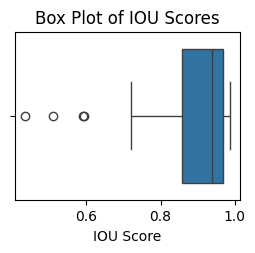

In [77]:
import seaborn as sns
plt.subplot(2, 2, 2)
sns.boxplot(data=IOU_no_padding_test, orient='h')
plt.title('Box Plot of IOU Scores')
plt.xlabel('IOU Score')

(array([          3,           6,           3,           6,           4,           0,          12,          12,          28,         111]),
 array([      0.474,      0.5265,       0.579,      0.6315,       0.684,      0.7365,       0.789,      0.8415,       0.894,      0.9465,       0.999]),
 <BarContainer object of 10 artists>)

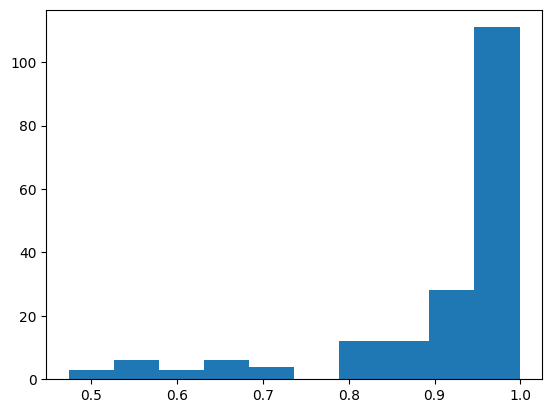

In [69]:
plt.hist(IOU_no_padding_train)

(array([          3,           6,           0,           9,           3,           2,          10,          10,          16,         125]),
 array([      0.471,      0.5236,      0.5762,      0.6288,      0.6814,       0.734,      0.7866,      0.8392,      0.8918,      0.9444,       0.997]),
 <BarContainer object of 10 artists>)

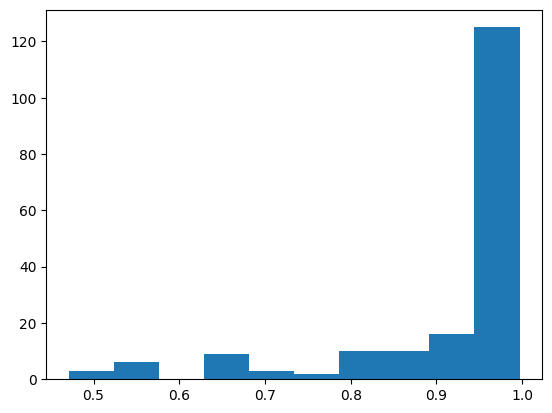

In [70]:
plt.hist(IOU_padding_train)

(array([          1,           2,           0,           0,           1,           0,           0,           4,           4,          14]),
 array([      0.512,      0.5601,      0.6082,      0.6563,      0.7044,      0.7525,      0.8006,      0.8487,      0.8968,      0.9449,       0.993]),
 <BarContainer object of 10 artists>)

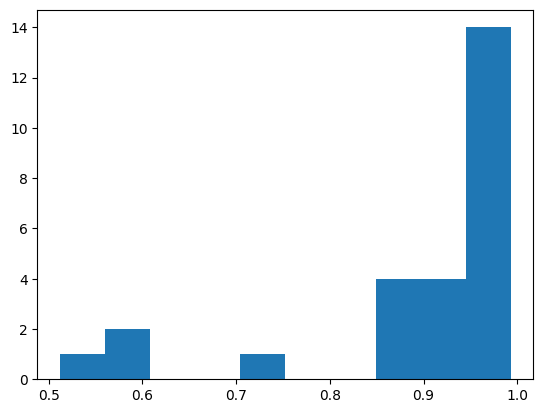

In [71]:
plt.hist(IOU_padding_test)

In [83]:
len(IOU_padding_test)

26

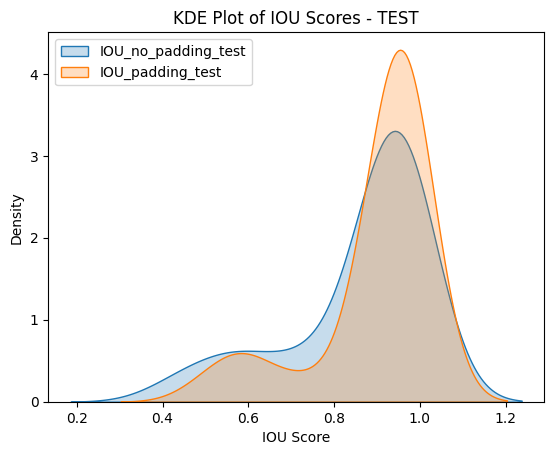

In [103]:
data_test = {
    'IOU_no_padding_test': IOU_no_padding_test,
    'IOU_padding_test': IOU_padding_test
}

df_test = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in data_test.items()]))

for col in df_test.columns:
    sns.kdeplot(df_test[col].dropna(), fill=True, label=col)
plt.title('KDE Plot of IOU Scores - TEST')
plt.xlabel('IOU Score')
plt.legend(loc='upper left')

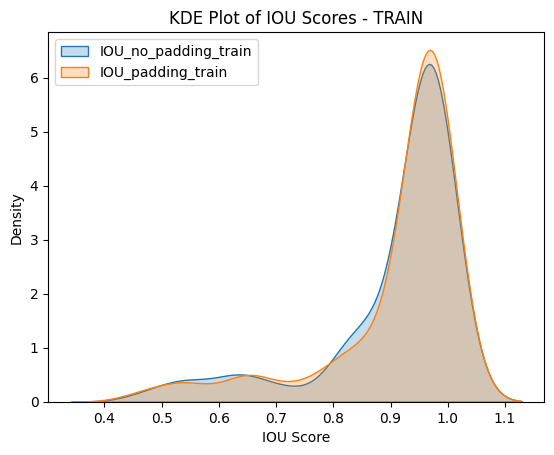

In [104]:
data_train = {
    'IOU_no_padding_train': IOU_no_padding_train,
    'IOU_padding_train': IOU_padding_train
}

df_train = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in data_train.items()]))

for col in df_train.columns:
    sns.kdeplot(df_train[col].dropna(), fill=True, label=col)
plt.title('KDE Plot of IOU Scores - TRAIN')
plt.xlabel('IOU Score')
plt.legend(loc='upper left')